In [1]:
import re, sys, math
import glob
import random
import json
import os 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from collections import OrderedDict
import pandas as pd
from helper_utilities import *
from helper_plotutilities import *

%matplotlib inline

In [2]:
#explist256 = ['combined_1_3_256_epoch20', 'combined_1_3_256', 'combined_aug_1_3_256',\
# 'combined_drop_1_3_256','combined_aug_drop_1_3_256']
keys = ["samples", "logloss", "weighted_logloss","accuracy", "weighted_accuracy", "precision","recall", "f1_score", "true_positive", \
       "false_positive","true_negative","false_negative", "zero_contour_labels", "zero_contour_pred", \
       "missed_pred_lt_05", "missed_pred_gt_25", "missed_pred_gt_50", "missed_pred_eq_100"]

# explist256 = [ 'combined_1_3_256', 'combined_aug_1_3_256', 'combined_drop_1_3_256','combined_aug_drop_1_3_256']

#image set that includes labels with zero contours in the training set
#explist256_0 = ['combined_1_3_0_256', 'combined_aug_1_3_0_256', 'combined_1_3_0_256_drop','combined_1_3_0_256_dicecoef', 'combined_1_3_0_256_drop_dicecoef']

#explist176 = ['combined_1_3_176', 'combined_1_3_176_aug_dice', 'combined_1_3_176_aug_drop_dice']
# explist176 = ['combined_1_3_176', 'combined_1_3_176_dice', 'combined_1_3_176_aug_dice', 'combined_1_3_176_drop_dice', 'combined_1_3_176_aug_drop_dice']

#explist176_0 = ['1_3_0_176_bn','combined_1_3_0_176_dice', 'combined_1_3_0_176_aug_dice','combined_1_3_0_176_drop_dice', 'combined_1_3_0_176_aug_drop_dice', 'combined_1_3_0_176_aug_drop_dice2']


In [ ]:
# RESULTS_PATH = '/masvol/heartsmart/unet_model/data/'
# label_file176_0 = '/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_176_test_labels.npy'

# perf176_0_df = pd.DataFrame( keys, columns=["Attribute"] )
# for results_file in explist176_0 :
#     pred_file = RESULTS_PATH + results_file + '_predictions.npy'
#     perf = compute_performance_statistics(label_file176_0, pred_file)
#     perf176_0_df[results_file]= perf176_0_df['Attribute'].map(perf)
    

In [ ]:
# perf176_0_df

In [ ]:
# RESULTS_PATH = '/masvol/heartsmart/unet_model/data/results/'
# label_file176 = '/masvol/heartsmart/unet_model/baseline/data/combined_1_3_176_test_labels.npy'

# perf176_df = pd.DataFrame( keys, columns=["Attribute"] )
# for results_file in explist176 :
#     pred_file = RESULTS_PATH + results_file + '_predictions.npy'
#     perf = compute_performance_statistics(label_file176, pred_file)
#     perf176_df[results_file]= perf176_df['Attribute'].map(perf)
    

In [ ]:
# perf176_df

In [ ]:
# RESULTS_PATH = '/masvol/heartsmart/unet_model/baseline/results/'
# label_file256 = '/masvol/heartsmart/unet_model/baseline/data/combined_1_3_256_test_labels.npy'

# perf256_df = pd.DataFrame( keys, columns=["Attribute"] )
# for results_file in explist256 :
#     pred_file = RESULTS_PATH + results_file + '_predictions.npy'
#     perf = compute_performance_statistics(label_file256, pred_file)
#     perf256_df[results_file]= perf256_df['Attribute'].map(perf)

In [ ]:
# RESULTS_PATH = '/masvol/heartsmart/unet_model/baseline/results/'
# label_file256_0 = '/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_256_test_labels.npy'

# perf256_0_df = pd.DataFrame( keys, columns=["Attribute"] )
# for results_file in explist256_0 :
#     pred_file = RESULTS_PATH + results_file + '_predictions.npy'
#     perf = compute_performance_statistics(label_file256_0, pred_file)
#     perf256_0_df[results_file]= perf256_0_df['Attribute'].map(perf)

In [ ]:
# perf256_df

In [ ]:
# file_name = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_176_perf_comparison_old.csv'
# perf176_0_df.to_csv(file_name, sep='\t')

In [ ]:
# file_name = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_176_perf_comparison_old.csv'
# perf176_df.to_csv(file_name, sep='\t')

In [ ]:
# file_name = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_perf_comparison.csv'
# perf256_0_df.to_csv(file_name, sep='\t')

In [ ]:
# file_name = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_256_perf_comparison.csv'
# perf256_df.to_csv(file_name, sep='\t')

In [38]:
# hist = '/masvol/heartsmart/unet_model/data/combined_1_2_176_dice_drop_32B_learning_history.json'

# plot_learning_history(hist)

In [39]:
# hist = '/masvol/heartsmart/unet_model/data/combined_1_2_256_dice_drop_32B_learning_history.json'

# plot_learning_history(hist)

In [ ]:
# reg for regular, no aug, no drop

In [37]:
# hist = '/masvol/heartsmart/unet_model/data/combined_1_2_256_dice_reg_32B_learning_history.json'

# plot_learning_history(hist)

In [40]:
# hist = '/masvol/heartsmart/unet_model/data/combined_1_2_176_dice_reg_32B_learning_history.json'

# plot_learning_history(hist)

In [ ]:
# perf176_df

In [10]:
explist256 = glob.glob("/masvol/heartsmart/unet_model/data/combined_1_2_256*32B_learning_history.json")

In [ ]:
# reg for regular

## all learning history of 256

Learning history of :/masvol/heartsmart/unet_model/data/combined_1_2_256_dice_reg_32B_learning_history.json
------------------------------
------------------------------
Model Parameters
tr_epoch  :  80
tr_loss_fn  :  dice_loss
tr_batchsize  :  32
tr_lrrate  :  2e-05
tr_model_name  :  combined_1_2_256_dice_reg_32B
tr_nGPUs  :  2
tr_dropout  :  False
tr_size  :  2437
tr_optimizer  :  Adam
------------------------------
Evaluation on Test set
eval_dice_coeff  :  0.0038253490140454636
eval_binary_accuracy  :  0.9756459554036458
eval_loss  :  0.9961746555787546
------------------------------
Values at first and last epoch
------------------------------
loss  :  0.8518809020488675 , 0.02680088581948356
val_dice_coeff  :  0.2908586253885363 , 0.9309137707850972
val_binary_accuracy  :  0.8889769882452293 , 0.9958538930924212
dice_coeff  :  0.14811909226284936 , 0.9731991141805164
binary_accuracy  :  0.5075903744071248 , 0.9987810348901704
val_loss  :  0.7091413736343384 , 0.06908622921490279


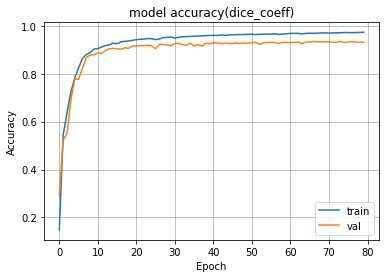

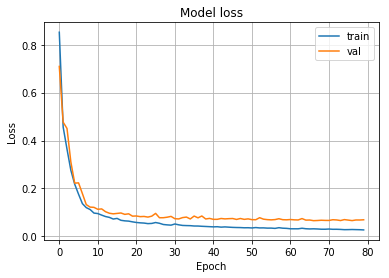

Learning history of :/masvol/heartsmart/unet_model/data/combined_1_2_256_dice_aug_32B_learning_history.json
------------------------------
------------------------------
Model Parameters
tr_epoch  :  80
tr_optimizer  :  Adam
tr_model_name  :  combined_1_2_256_dice_aug_32B
tr_batchsize  :  32
tr_lrrate  :  2e-05
tr_loss_fn  :  dice_loss
tr_nGPUs  :  2
tr_dropout  :  False
tr_size  :  9748
------------------------------
Evaluation on Test set
eval_binary_accuracy  :  0.9755861631146183
eval_dice_coeff  :  2.1357740802664518e-05
eval_loss  :  0.9999786390198602
------------------------------
Values at first and last epoch
------------------------------
val_binary_accuracy  :  0.9793604765182886 , 0.9959762177711878
dice_coeff  :  0.44536664228189843 , 0.9764883161722375
binary_accuracy  :  0.8512319509082343 , 0.9976783589877725
loss  :  0.554633357763963 , 0.02351168382776245
val_dice_coeff  :  0.6514141395153143 , 0.9498555336243067
val_loss  :  0.34858586048468565 , 0.05014446637569329

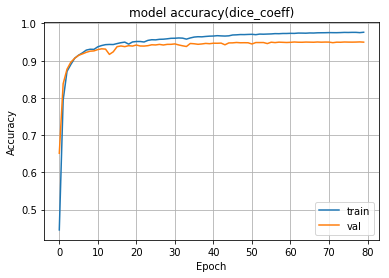

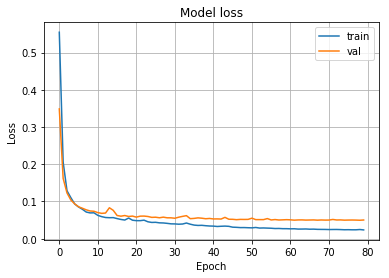

Learning history of :/masvol/heartsmart/unet_model/data/combined_1_2_256_dice_drop_32B_learning_history.json
------------------------------
------------------------------
Model Parameters
tr_epoch  :  80
tr_optimizer  :  Adam
tr_loss_fn  :  dice_loss
tr_batchsize  :  32
tr_lrrate  :  2e-05
tr_model_name  :  combined_1_2_256_dice_drop_32B
tr_nGPUs  :  2
tr_dropout  :  True
tr_size  :  2437
------------------------------
Evaluation on Test set
eval_dice_coeff  :  0.03150906013669791
eval_binary_accuracy  :  0.9760491265190973
eval_loss  :  0.96849093525498
------------------------------
Values at first and last epoch
------------------------------
binary_accuracy  :  0.3501334431050312 , 0.9986095480150661
val_binary_accuracy  :  0.8984514142646164 , 0.9944769749875928
dice_coeff  :  0.10740416159441436 , 0.969607074820977
loss  :  0.892595833910007 , 0.03039292517902302
val_dice_coeff  :  0.3047320945341079 , 0.9118263281759669
val_loss  :  0.6952679059544548 , 0.08817367182403314
-----

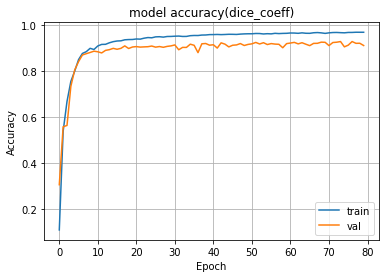

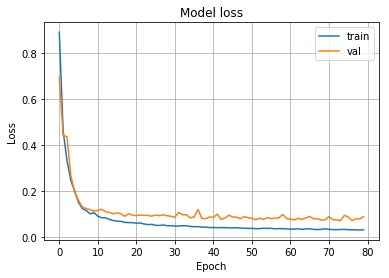

Learning history of :/masvol/heartsmart/unet_model/data/combined_1_2_256_dice_aug_drop_32B_learning_history.json
------------------------------
------------------------------
Model Parameters
tr_epoch  :  80
tr_model_name  :  combined_1_2_256_dice_aug_drop_32B
tr_batchsize  :  32
tr_lrrate  :  2e-05
tr_loss_fn  :  dice_loss
tr_nGPUs  :  2
tr_dropout  :  True
tr_size  :  9748
tr_optimizer  :  Adam
------------------------------
Evaluation on Test set
eval_dice_coeff  :  2.135774274291988e-05
eval_binary_accuracy  :  0.9755861631146183
eval_loss  :  0.9999786390198602
------------------------------
Values at first and last epoch
------------------------------
binary_accuracy  :  0.8099141694790707 , 0.9975458826276393
val_loss  :  0.3919411618892963 , 0.05172359460439437
val_dice_coeff  :  0.6080588385997674 , 0.9482764053956056
val_binary_accuracy  :  0.9843842177513318 , 0.9959076791543227
loss  :  0.5407215602185733 , 0.02677649238165234
dice_coeff  :  0.4592784388336227 , 0.973223507

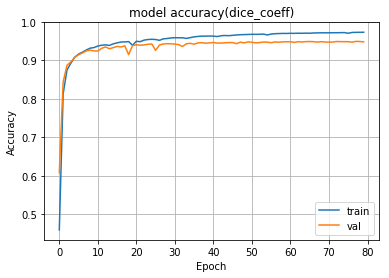

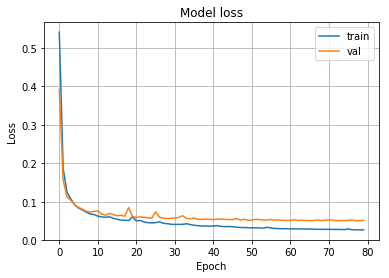

In [11]:
for results_file in explist256 :
    history_file = results_file
    #history_file = RESULTS_PATH + results_file + '_learning_history.json'
    print ('='*30)
    print ('='*30)
    print ("Learning history of :" + results_file)
    print ('-'*30)
    
    plot_learning_history(history_file)
    

## all learning history of 176

In [17]:
explist176 = glob.glob("/masvol/heartsmart/unet_model/data/combined_1_2_176*32B_learning_history.json")

Learning history of :/masvol/heartsmart/unet_model/data/combined_1_2_176_dice_aug_32B_learning_history.json
------------------------------
------------------------------
Model Parameters
tr_epoch  :  80
tr_loss_fn  :  dice_loss
tr_batchsize  :  32
tr_lrrate  :  2e-05
tr_model_name  :  combined_1_2_176_dice_aug_32b
tr_nGPUs  :  2
tr_dropout  :  False
tr_size  :  9748
tr_optimizer  :  Adam
------------------------------
Evaluation on Test set
eval_dice_coeff  :  0.002207696518895251
eval_binary_accuracy  :  0.9465355541970994
eval_loss  :  0.9977923066527755
------------------------------
Values at first and last epoch
------------------------------
loss  :  0.4401892941253067 , 0.02346484481936756
binary_accuracy  :  0.8424561634892896 , 0.9951059360417319
val_dice_coeff  :  0.7548910698523889 , 0.9499952954512376
val_binary_accuracy  :  0.9717572457362444 , 0.9915950639431294
dice_coeff  :  0.5598107058135446 , 0.9765351551806324
val_loss  :  0.24510893014761118 , 0.050004704548762394


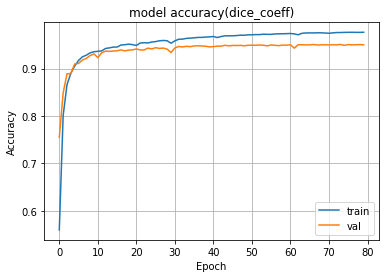

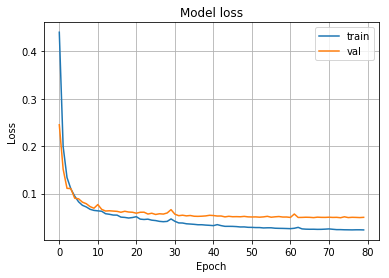

Learning history of :/masvol/heartsmart/unet_model/data/combined_1_2_176_dice_reg_32B_learning_history.json
------------------------------
------------------------------
Model Parameters
tr_epoch  :  80
tr_optimizer  :  Adam
tr_model_name  :  combined_1_2_176_dice_reg_32b
tr_batchsize  :  32
tr_lrrate  :  2e-05
tr_nGPUs  :  2
tr_dropout  :  False
tr_size  :  2437
tr_loss_fn  :  dice_loss
------------------------------
Evaluation on Test set
eval_dice_coeff  :  0.02960764917510527
eval_binary_accuracy  :  0.9473101059595744
eval_loss  :  0.9703923485897206
------------------------------
Values at first and last epoch
------------------------------
loss  :  0.7682273963465331 , 0.02688651335062034
val_loss  :  0.5460216627746332 , 0.06461958025322585
val_binary_accuracy  :  0.86767406346368 , 0.9914796518497779
binary_accuracy  :  0.5057786676503255 , 0.9974463267042553
val_dice_coeff  :  0.45397833917961744 , 0.9353804197467741
dice_coeff  :  0.2317726040204529 , 0.9731134866493797
----

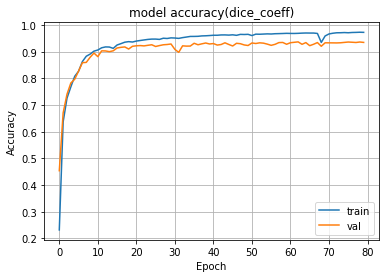

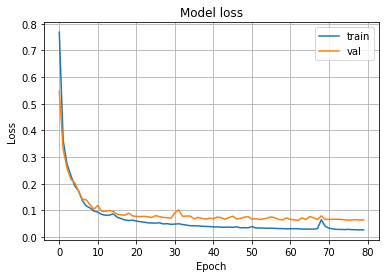

Learning history of :/masvol/heartsmart/unet_model/data/combined_1_2_176_dice_drop_32B_learning_history.json
------------------------------
------------------------------
Model Parameters
tr_epoch  :  80
tr_optimizer  :  Adam
tr_loss_fn  :  dice_loss
tr_batchsize  :  32
tr_lrrate  :  2e-05
tr_model_name  :  combined_1_2_176_dice_drop_32b
tr_nGPUs  :  2
tr_dropout  :  True
tr_size  :  2437
------------------------------
Evaluation on Test set
eval_dice_coeff  :  0.1555256583072521
eval_binary_accuracy  :  0.9511450917632491
eval_loss  :  0.8444743483154862
------------------------------
Values at first and last epoch
------------------------------
loss  :  0.8137299486035993 , 0.02914497444359323
binary_accuracy  :  0.3563687329784059 , 0.9972247322318859
val_binary_accuracy  :  0.9323210833502598 , 0.9899777643016128
dice_coeff  :  0.18627005298667348 , 0.9708550255564068
val_dice_coeff  :  0.544361523917464 , 0.9261123450075994
val_loss  :  0.4556384780367867 , 0.07388765499240062
---

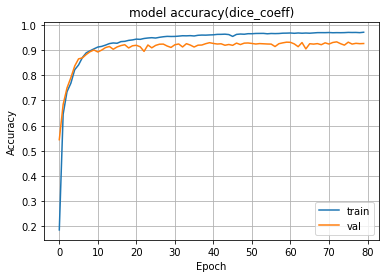

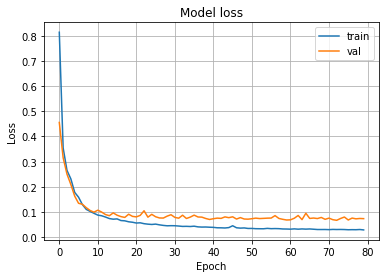

Learning history of :/masvol/heartsmart/unet_model/data/combined_1_2_176_dice_aug_drop_32B_learning_history.json
------------------------------
------------------------------
Model Parameters
tr_epoch  :  80
tr_optimizer  :  Adam
tr_batchsize  :  32
tr_lrrate  :  2e-05
tr_model_name  :  combined_1_2_176_dice_aug_drop_32b
tr_nGPUs  :  2
tr_dropout  :  True
tr_loss_fn  :  dice_loss
tr_size  :  9748
------------------------------
Evaluation on Test set
eval_binary_accuracy  :  0.9469184085174843
eval_dice_coeff  :  0.01749885024295913
eval_loss  :  0.9825011491775513
------------------------------
Values at first and last epoch
------------------------------
val_dice_coeff  :  0.7615108669721163 , 0.9472898605542305
val_binary_accuracy  :  0.9728610573670803 , 0.991359908641913
binary_accuracy  :  0.807280844956002 , 0.9948095414203753
dice_coeff  :  0.5606473593352299 , 0.9730170631475955
loss  :  0.43935264075649305 , 0.026982936852404507
val_loss  :  0.23848913279863504 , 0.05271013944

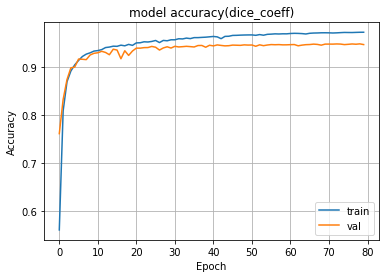

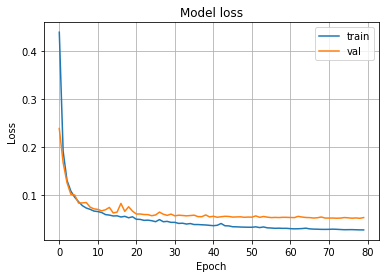

In [18]:
for results_file in explist176 :
    history_file = results_file
    #history_file = RESULTS_PATH + results_file + '_learning_history.json'
    print ('='*30)
    print ('='*30)
    print ("Learning history of :" + results_file)
    print ('-'*30)
    
    plot_learning_history(history_file)

In [ ]:
# label_file = "/masvol/heartsmart/unet_model/data/baseline/combined_1_3_256_test_labels.npy"
# pred_file = "/masvol/heartsmart/unet_model/data/baseline/combined_1_3_256_predictions.npy"
# y_true_f = np.load(label_file)
# y_pred_f = np.load(pred_file)
# p = get_performance_statistics(y_true_f, y_pred_f)
# print (p)

In [ ]:
# perf_file = "perf_values.json"
# print ("Saving Performance values", perf_file)
# with open(perf_file, 'w') as file:
#     json.dump(p, file, indent=2)
# print('-'*30)

## 256 AUG

------------------------------
Model Parameters
tr_epoch  :  80
tr_optimizer  :  Adam
tr_model_name  :  combined_1_2_256_dice_aug_32B
tr_batchsize  :  32
tr_lrrate  :  2e-05
tr_loss_fn  :  dice_loss
tr_nGPUs  :  2
tr_dropout  :  False
tr_size  :  9748
------------------------------
Evaluation on Test set
eval_binary_accuracy  :  0.9755861631146183
eval_dice_coeff  :  2.1357740802664518e-05
eval_loss  :  0.9999786390198602
------------------------------
Values at first and last epoch
------------------------------
val_binary_accuracy  :  0.9793604765182886 , 0.9959762177711878
dice_coeff  :  0.44536664228189843 , 0.9764883161722375
binary_accuracy  :  0.8512319509082343 , 0.9976783589877725
loss  :  0.554633357763963 , 0.02351168382776245
val_dice_coeff  :  0.6514141395153143 , 0.9498555336243067
val_loss  :  0.34858586048468565 , 0.050144466375693295
------------------------------
------------------------------


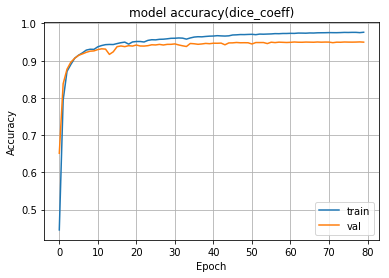

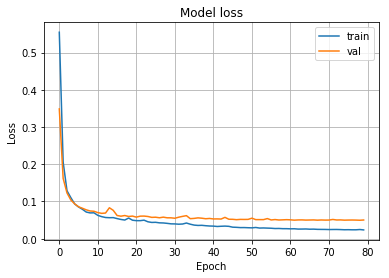

------------------------------
Loss and Accuracy
------------------------------
log_loss :  0.04516891273069395   Accuracy:  0.9558360153251653
weighted log_loss :  1.1151932563545697   Weighted_accuracy:  0.3278519133112792
------------------------------
Model Performance
------------------------------
precision : 0.946098811567623
recall : 0.9529208603783368
f1 score : 0.9494975821899719

true_p = 411658, false_p = 23453, true_neg = 17239271, false_neg = 20338
confuion matrix
[[17239271    23453]
 [   20338   411658]]



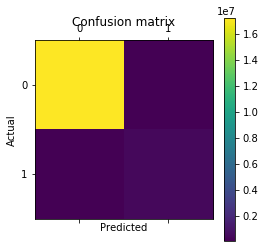

------------------------------
------------------------------
Number of Samples : 270, image size : 256 x 256 
------------------------------
Outliers
------------------------------
Sample Index of labels with zero contours [31, 70, 89, 92]
Sample Index of predictions with zero contours [18, 31, 55, 74, 89, 135, 153, 162]
max-sigmoid values with zero contours [7.2820736e-09, 1.7285119e-10, 0.056817915, 6.450861e-08, 9.055593e-11, 5.685329e-10, 0.00010675494, 1.0382002e-08]
(270,)
------------------------------
Statistics on missed predictions of contour pixels (white pixels)
------------------------------
Sample Index where missed predictions <.05% 4 [31, 89, 225, 239]
Sample Index where missed predictions >25% 34 [12, 18, 20, 39, 55, 65, 67, 70, 72, 73, 74, 86, 92, 95, 113, 117, 121, 123, 124, 135, 139, 153, 162, 167, 171, 176, 187, 197, 206, 207, 216, 250, 257, 268]
Sample Index where missed predictions >50% 25 [12, 18, 20, 39, 55, 67, 70, 72, 73, 74, 86, 92, 95, 113, 117, 121, 124, 

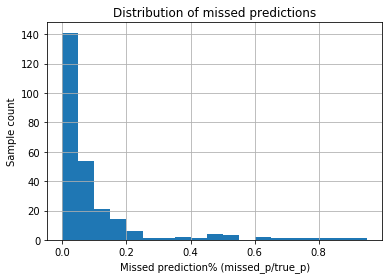

------------------------------
------------------------------
samples, max, min  270 1.0 0.0


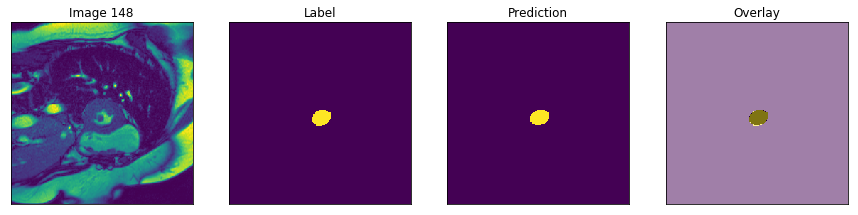

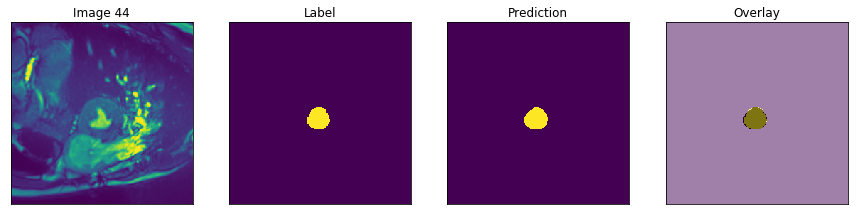

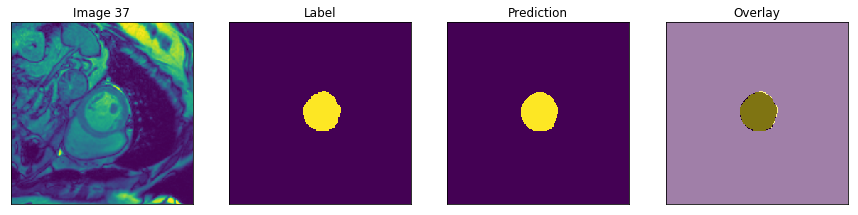

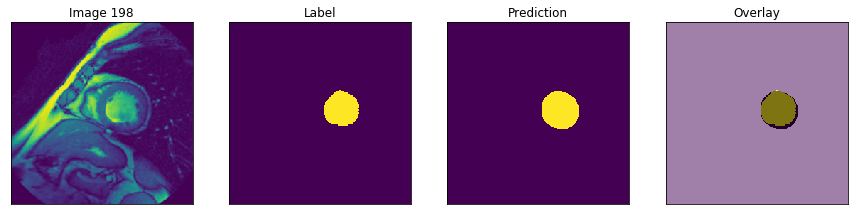

------------------------------
------------------------------
samples, max, min  270 1.0 0.0


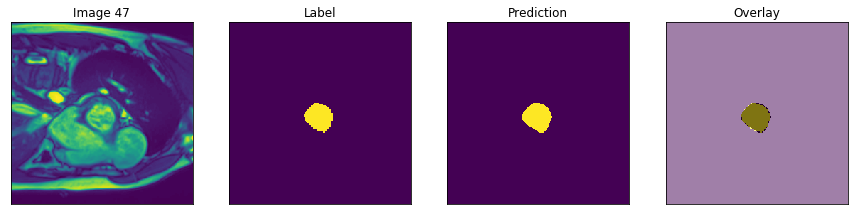

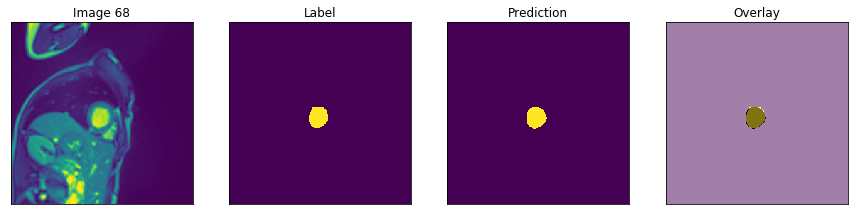

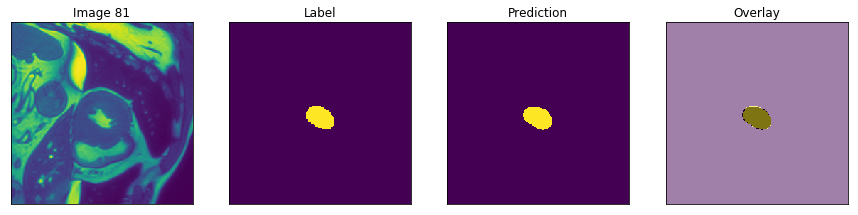

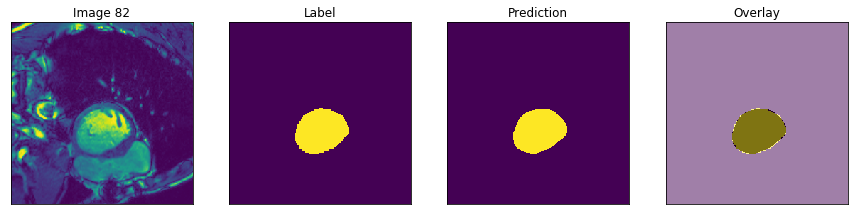

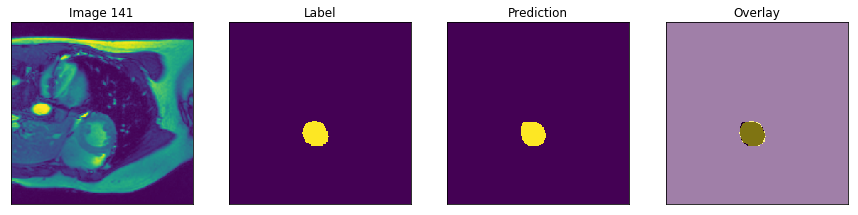

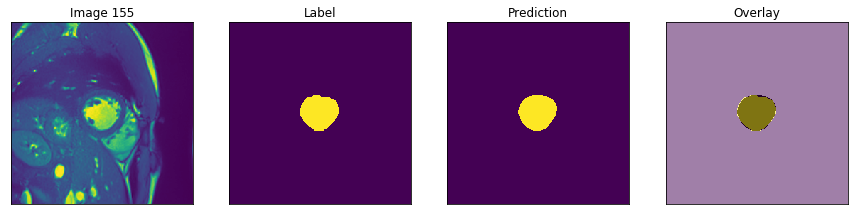

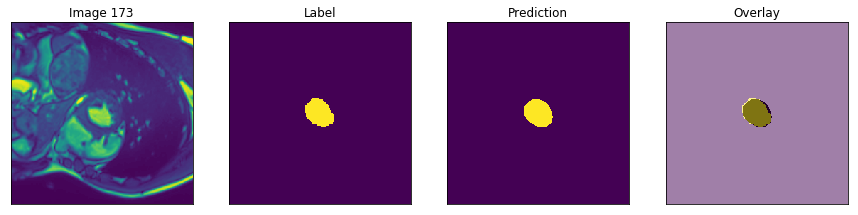

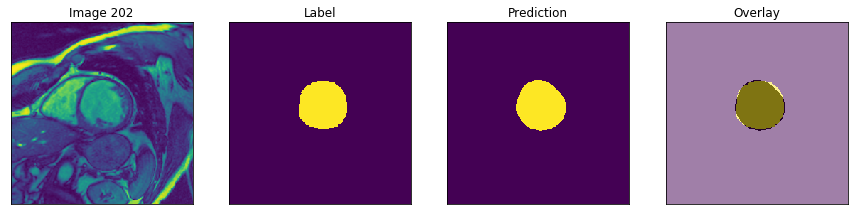

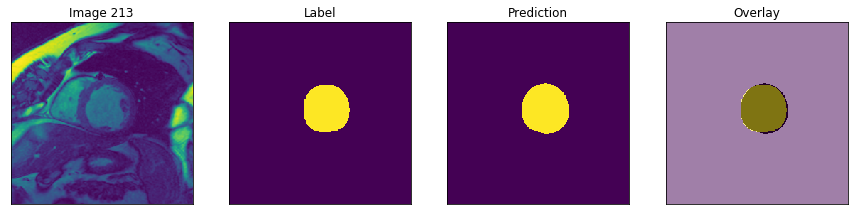

In [20]:
weights_file = "/masvol/heartsmart/unet_model/data/combined_1_2_256_dice_aug_32B.hdf5"
history_file = '/masvol/heartsmart/unet_model/data/combined_1_2_256_dice_aug_32B_learning_history.json'
image_file = "/masvol/output/unet_training/combined_1_2_256_test_images.npy"
label_file = "/masvol/output/unet_training/combined_1_2_256_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/data/combined_1_2_256_dice_aug_32B_predictions.npy"
plot_learning_history(history_file)
show_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


## Analysis on training with 256x256  combined data set (ACDC + Sunnybrook)
### Below are the results of 4 tests
1. Training with combined dataset
2. Training with combined dataset + Augmentation
3. Training with combined dataset (no augmentation),  using Unet with dropout layers
4. Training with combined dataset + Augmentation,  using Unet with dropout layers

## Analysis on training with 256x256  combined data set (ACDC + Sunnybrook) (No labels with zero contours)

### data set prefix combined_1_3_256 

### Below are the results of 4 tests
1. Training with combined dataset
2. Training with combined dataset + Augmentation
3. Training with combined dataset (no augmentation),  using Unet with dropout layers
4. Training with combined dataset + Augmentation,  using Unet with dropout layers

In [ ]:
# zcontour = [50, 53, 72, 73, 116, 118, 145, 188]
# display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

## reg for just dice, regular 256

------------------------------
Model Parameters
tr_epoch  :  80
tr_loss_fn  :  dice_loss
tr_batchsize  :  32
tr_lrrate  :  2e-05
tr_model_name  :  combined_1_2_256_dice_reg_32B
tr_nGPUs  :  2
tr_dropout  :  False
tr_size  :  2437
tr_optimizer  :  Adam
------------------------------
Evaluation on Test set
eval_dice_coeff  :  0.0038253490140454636
eval_binary_accuracy  :  0.9756459554036458
eval_loss  :  0.9961746555787546
------------------------------
Values at first and last epoch
------------------------------
loss  :  0.8518809020488675 , 0.02680088581948356
val_dice_coeff  :  0.2908586253885363 , 0.9309137707850972
val_binary_accuracy  :  0.8889769882452293 , 0.9958538930924212
dice_coeff  :  0.14811909226284936 , 0.9731991141805164
binary_accuracy  :  0.5075903744071248 , 0.9987810348901704
val_loss  :  0.7091413736343384 , 0.06908622921490279
------------------------------
------------------------------


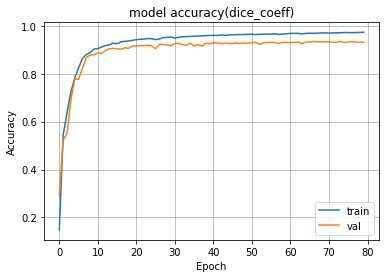

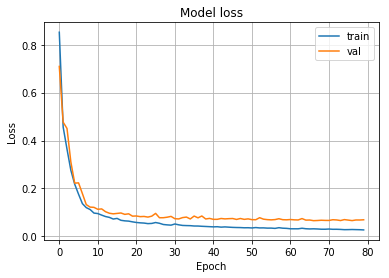

------------------------------
Loss and Accuracy
------------------------------
log_loss :  0.03694509922476658   Accuracy:  0.9637290433682904
weighted log_loss :  0.7359652392998676   Weighted_accuracy:  0.47904284476401665
------------------------------
Model Performance
------------------------------
precision : 0.9269688762837327
recall : 0.9563167251548625
f1 score : 0.9414141322070165

true_p = 413125, false_p = 32548, true_neg = 17230176, false_neg = 18871
confuion matrix
[[17230176    32548]
 [   18871   413125]]



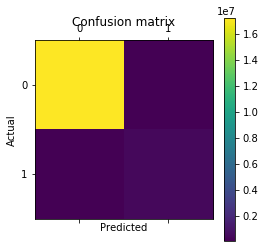

------------------------------
------------------------------
Number of Samples : 270, image size : 256 x 256 
------------------------------
Outliers
------------------------------
Sample Index of labels with zero contours [31, 70, 89, 92]
Sample Index of predictions with zero contours [12, 31, 73, 74, 95, 124, 135, 153, 162, 216]
max-sigmoid values with zero contours [0.015413584, 0.011078658, 1.2473573e-08, 5.5784066e-10, 9.3035145e-05, 0.001722527, 1.955115e-10, 0.003780814, 0.00044504978, 0.0006901264]
(270,)
------------------------------
Statistics on missed predictions of contour pixels (white pixels)
------------------------------
Sample Index where missed predictions <.05% 1 [31]
Sample Index where missed predictions >25% 46 [9, 12, 18, 19, 20, 21, 39, 55, 58, 65, 67, 70, 72, 73, 74, 83, 86, 89, 92, 95, 113, 117, 124, 135, 139, 153, 162, 167, 171, 179, 181, 183, 185, 192, 193, 195, 197, 198, 206, 216, 228, 250, 251, 257, 258, 268]
Sample Index where missed predictions >50% 28

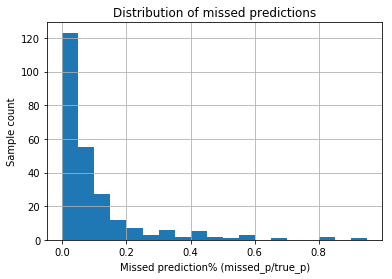

------------------------------
------------------------------
samples, max, min  270 1.0 0.0


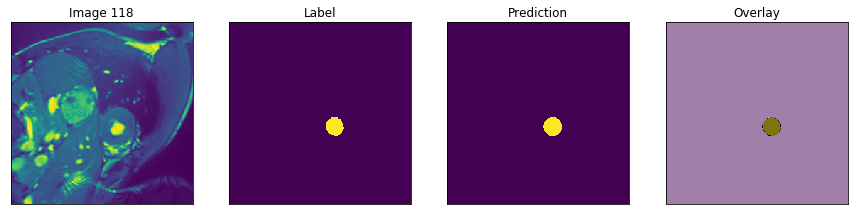

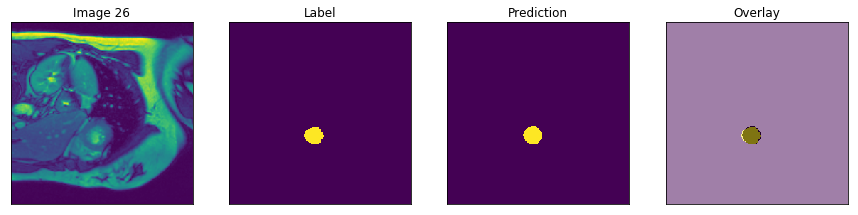

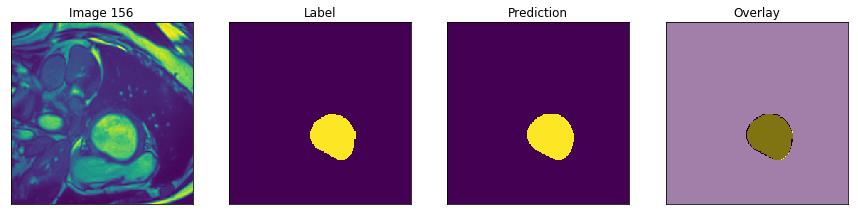

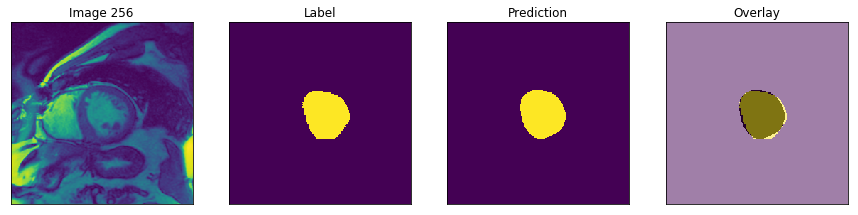

------------------------------
------------------------------
samples, max, min  270 1.0 0.0


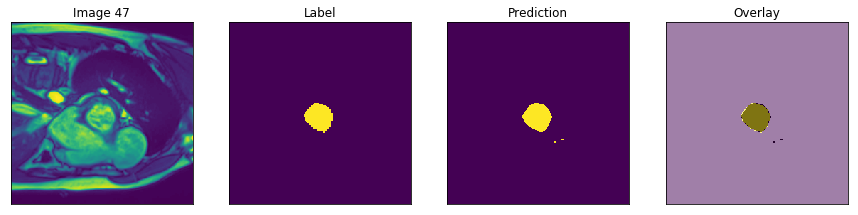

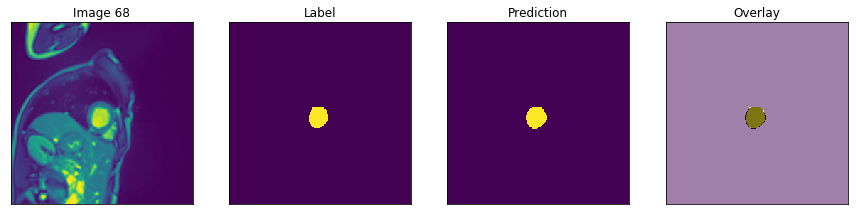

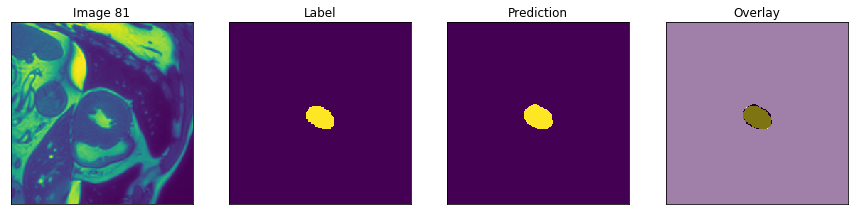

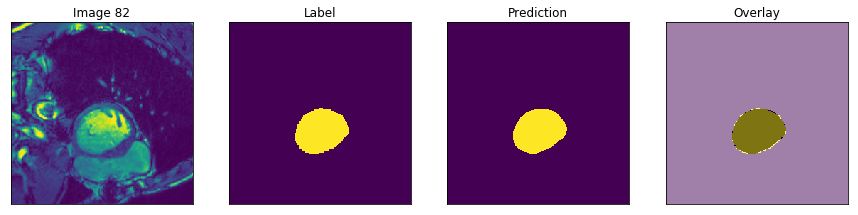

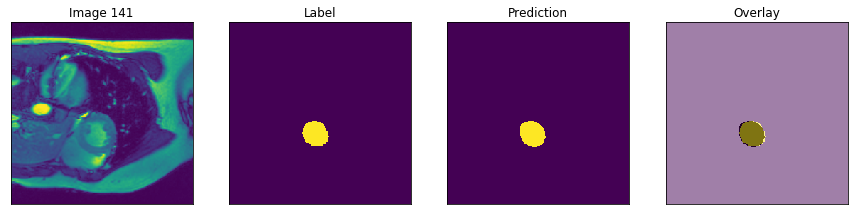

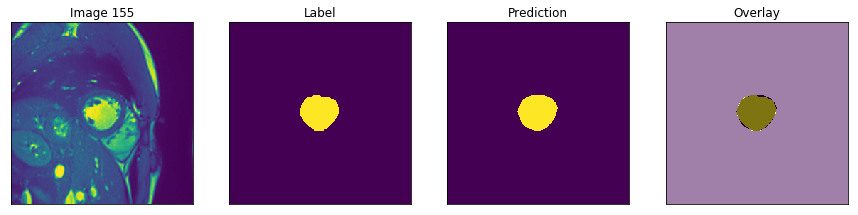

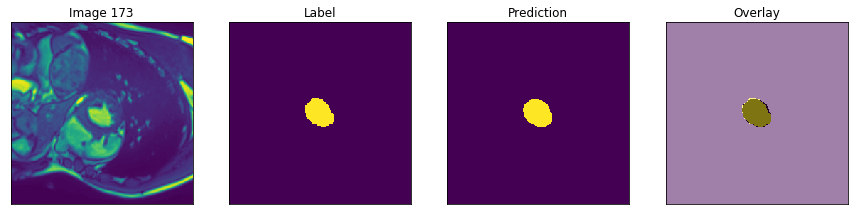

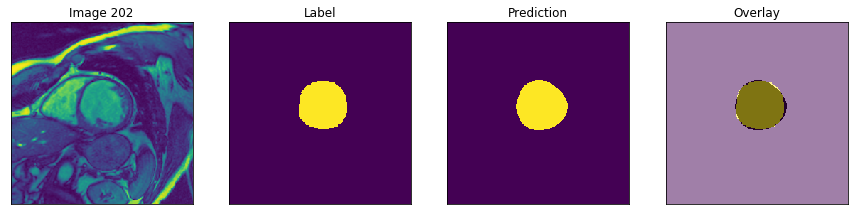

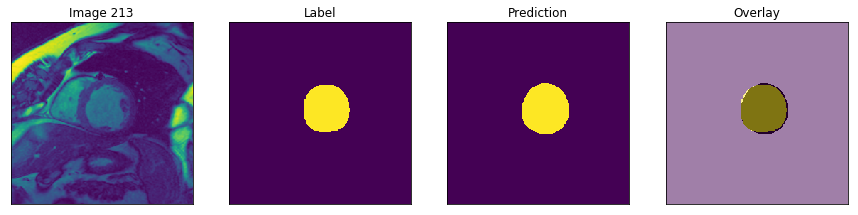

In [22]:
weights_file = "/masvol/heartsmart/unet_model/data/combined_1_2_256_dice_reg_32B.hdf5"
history_file = '/masvol/heartsmart/unet_model/data/combined_1_2_256_dice_reg_32B_learning_history.json'
image_file = "/masvol/output/unet_training/combined_1_2_256_test_images.npy"
label_file = "/masvol/output/unet_training/combined_1_2_256_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/data/combined_1_2_256_dice_reg_32B_predictions.npy"
plot_learning_history(history_file)
show_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


In [ ]:
# weights_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_256_aug_dice.hdf5"
# history_file = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_256_aug_dice_learning_history.json'
# image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_256_test_images.npy"
# label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_256_test_labels.npy"
# pred_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_256_aug_dice_predictions.npy"
# plot_learning_history(history_file)
# show_performance_statistics(label_file, pred_file)
# find_outliers(label_file, pred_file)
# display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
# print('-'*30)
# print('-'*30)
# zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
# display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


## 256 drop

------------------------------
Model Parameters
tr_epoch  :  80
tr_optimizer  :  Adam
tr_loss_fn  :  dice_loss
tr_batchsize  :  32
tr_lrrate  :  2e-05
tr_model_name  :  combined_1_2_256_dice_drop_32B
tr_nGPUs  :  2
tr_dropout  :  True
tr_size  :  2437
------------------------------
Evaluation on Test set
eval_dice_coeff  :  0.03150906013669791
eval_binary_accuracy  :  0.9760491265190973
eval_loss  :  0.96849093525498
------------------------------
Values at first and last epoch
------------------------------
binary_accuracy  :  0.3501334431050312 , 0.9986095480150661
val_binary_accuracy  :  0.8984514142646164 , 0.9944769749875928
dice_coeff  :  0.10740416159441436 , 0.969607074820977
loss  :  0.892595833910007 , 0.03039292517902302
val_dice_coeff  :  0.3047320945341079 , 0.9118263281759669
val_loss  :  0.6952679059544548 , 0.08817367182403314
------------------------------
------------------------------


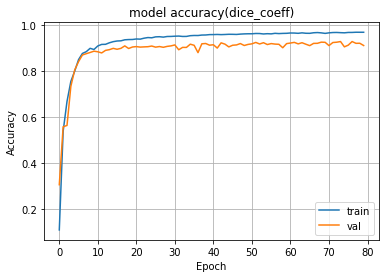

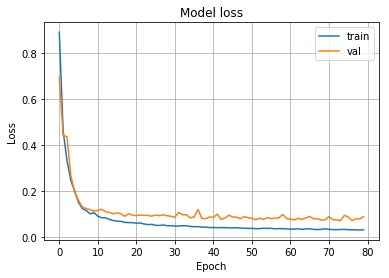

------------------------------
Loss and Accuracy
------------------------------
log_loss :  0.053855916684091655   Accuracy:  0.9475686254961196
weighted log_loss :  0.5973351588063585   Weighted_accuracy:  0.55027608234115
------------------------------
Model Performance
------------------------------
precision : 0.8833212819309306
recall : 0.9671108065815425
f1 score : 0.9233190050498912

true_p = 417788, false_p = 55186, true_neg = 17207538, false_neg = 14208
confuion matrix
[[17207538    55186]
 [   14208   417788]]



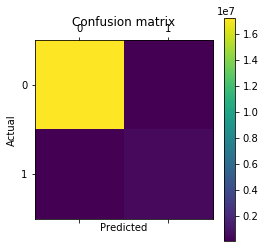

------------------------------
------------------------------
Number of Samples : 270, image size : 256 x 256 
------------------------------
Outliers
------------------------------
Sample Index of labels with zero contours [31, 70, 89, 92]
Sample Index of predictions with zero contours [55, 73, 95, 124, 135, 162, 216]
max-sigmoid values with zero contours [0.00011273135, 0.00041051907, 1.4023407e-06, 0.0025602826, 1.2444324e-11, 0.00058146205, 0.00064136746]
(270,)
------------------------------
Statistics on missed predictions of contour pixels (white pixels)
------------------------------
Sample Index where missed predictions <.05% 3 [68, 115, 130]
Sample Index where missed predictions >25% 62 [3, 9, 12, 17, 18, 19, 20, 21, 31, 39, 40, 47, 54, 55, 63, 65, 67, 70, 72, 73, 74, 83, 84, 86, 89, 92, 95, 113, 117, 121, 124, 135, 139, 144, 146, 153, 162, 164, 171, 172, 176, 179, 181, 183, 185, 188, 192, 193, 195, 197, 198, 206, 208, 216, 219, 228, 250, 251, 257, 258, 261, 268]
Sample Index

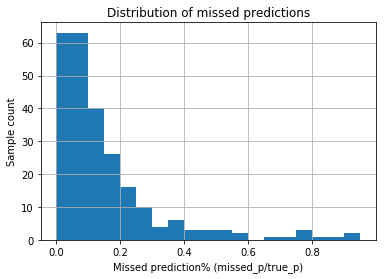

------------------------------
------------------------------
samples, max, min  270 1.0 0.0


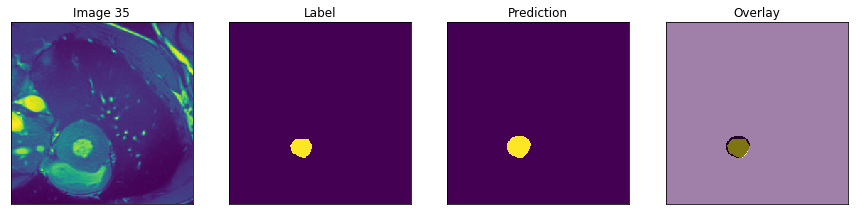

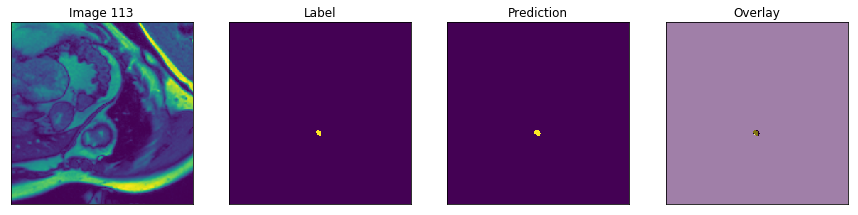

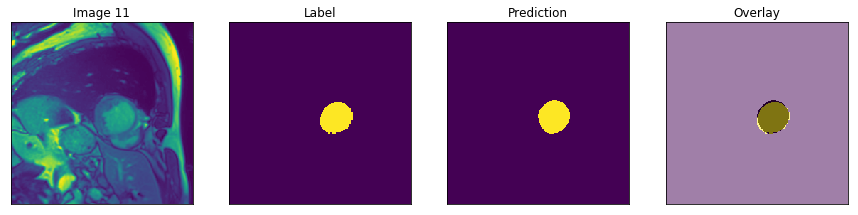

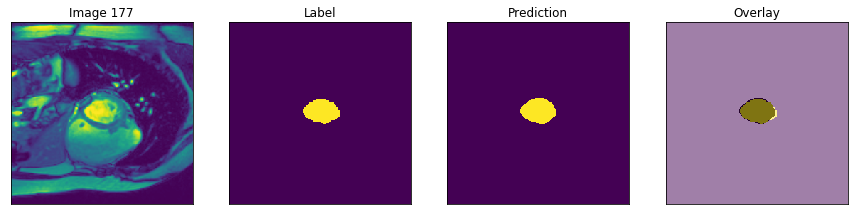

------------------------------
------------------------------
samples, max, min  270 1.0 0.0


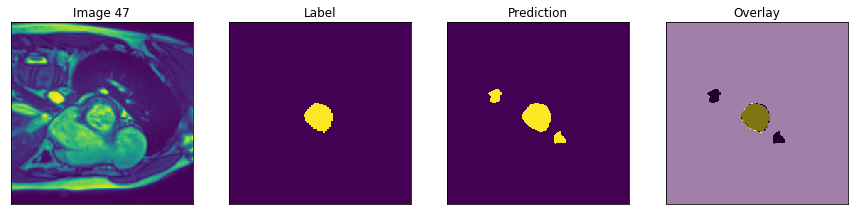

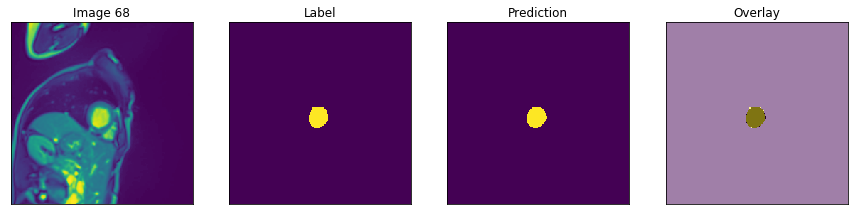

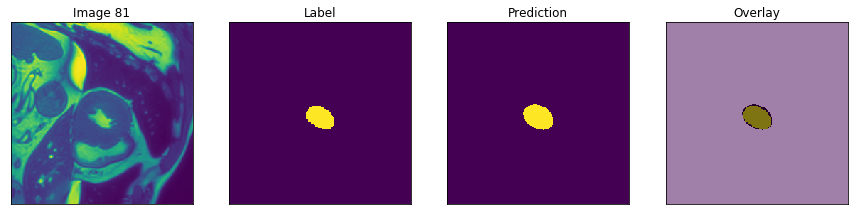

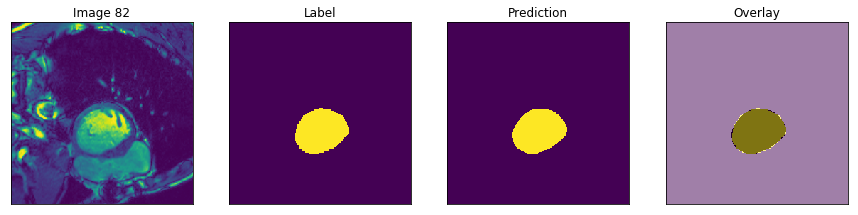

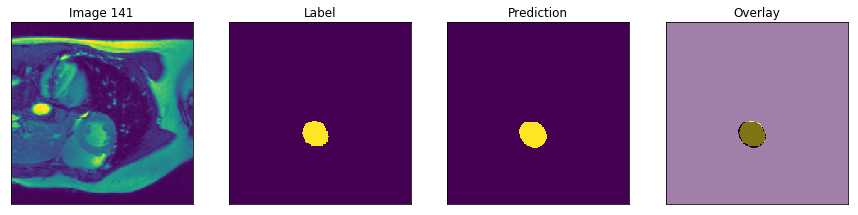

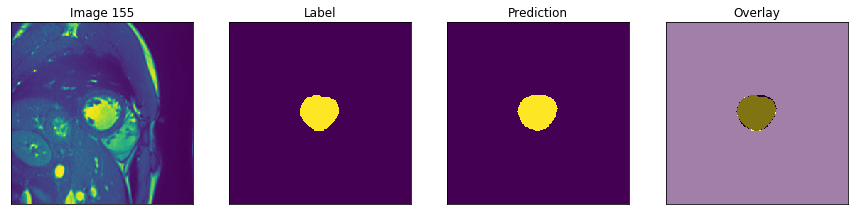

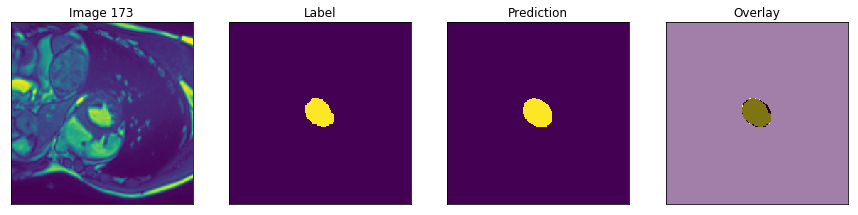

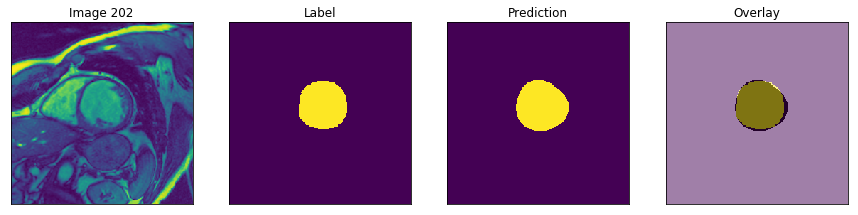

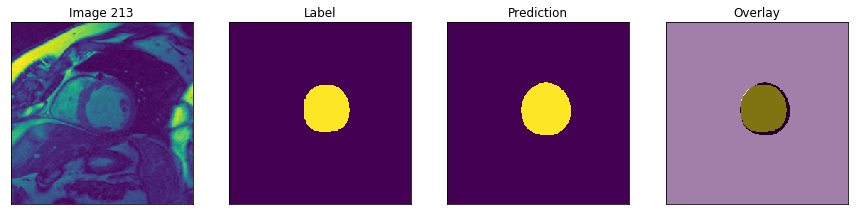

In [23]:
image_file = "/masvol/output/unet_training/combined_1_2_256_test_images.npy"
label_file = "/masvol/output/unet_training/combined_1_2_256_test_labels.npy"

weights_file = "/masvol/heartsmart/unet_model/data/combined_1_2_256_dice_drop_32B.hdf5"
history_file = '/masvol/heartsmart/unet_model/data/combined_1_2_256_dice_drop_32B_learning_history.json'
image_file = "/masvol/output/unet_training/combined_1_2_256_test_images.npy"
label_file = "/masvol/output/unet_training/combined_1_2_256_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/data/combined_1_2_256_dice_drop_32B_predictions.npy"
plot_learning_history(history_file)
show_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


## 256 aug drop

------------------------------
Model Parameters
tr_epoch  :  80
tr_model_name  :  combined_1_2_256_dice_aug_drop_32B
tr_batchsize  :  32
tr_lrrate  :  2e-05
tr_loss_fn  :  dice_loss
tr_nGPUs  :  2
tr_dropout  :  True
tr_size  :  9748
tr_optimizer  :  Adam
------------------------------
Evaluation on Test set
eval_dice_coeff  :  2.135774274291988e-05
eval_binary_accuracy  :  0.9755861631146183
eval_loss  :  0.9999786390198602
------------------------------
Values at first and last epoch
------------------------------
binary_accuracy  :  0.8099141694790707 , 0.9975458826276393
val_loss  :  0.3919411618892963 , 0.05172359460439437
val_dice_coeff  :  0.6080588385997674 , 0.9482764053956056
val_binary_accuracy  :  0.9843842177513318 , 0.9959076791543227
loss  :  0.5407215602185733 , 0.02677649238165234
dice_coeff  :  0.4592784388336227 , 0.9732235076183476
------------------------------
------------------------------


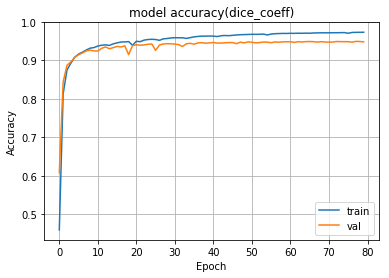

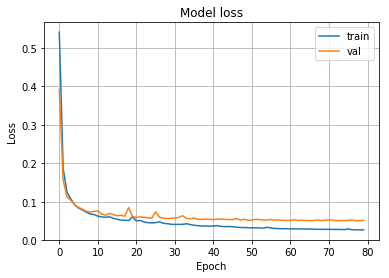

------------------------------
Loss and Accuracy
------------------------------
log_loss :  0.041670655210455855   Accuracy:  0.959185631347616
weighted log_loss :  0.9579087024199086   Weighted_accuracy:  0.383694466820883
------------------------------
Model Performance
------------------------------
precision : 0.9475875637711332
recall : 0.9588051741219826
f1 score : 0.9531633655733593

true_p = 414200, false_p = 22910, true_neg = 17239814, false_neg = 17796
confuion matrix
[[17239814    22910]
 [   17796   414200]]



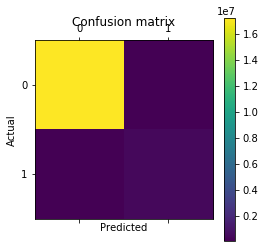

------------------------------
------------------------------
Number of Samples : 270, image size : 256 x 256 
------------------------------
Outliers
------------------------------
Sample Index of labels with zero contours [31, 70, 89, 92]
Sample Index of predictions with zero contours [18, 31, 55, 74, 89, 135, 139, 162, 171, 176, 216]
max-sigmoid values with zero contours [4.6006755e-15, 1.5046235e-11, 3.3404798e-10, 3.4907908e-14, 8.033194e-18, 3.1306964e-13, 3.6088757e-10, 1.998395e-12, 1.391692e-12, 2.7364779e-08, 1.9679175e-10]
(270,)
------------------------------
Statistics on missed predictions of contour pixels (white pixels)
------------------------------
Sample Index where missed predictions <.05% 5 [31, 89, 108, 217, 239]
Sample Index where missed predictions >25% 35 [9, 12, 17, 18, 19, 20, 39, 55, 65, 67, 70, 72, 73, 74, 86, 92, 95, 113, 117, 121, 124, 135, 139, 153, 162, 167, 171, 176, 192, 197, 198, 216, 250, 257, 268]
Sample Index where missed predictions >50% 25 [9, 1

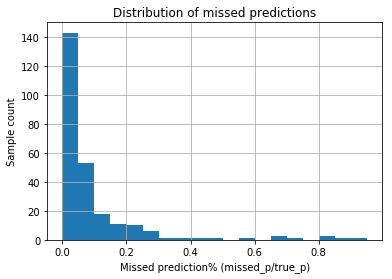

------------------------------
------------------------------
samples, max, min  270 1.0 0.0


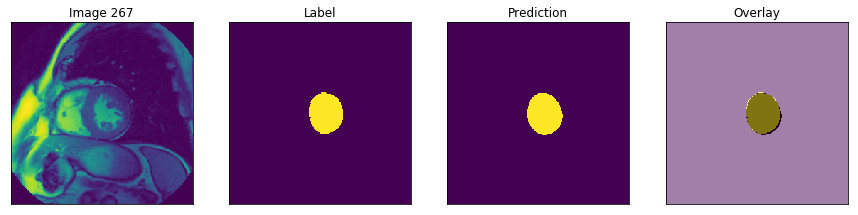

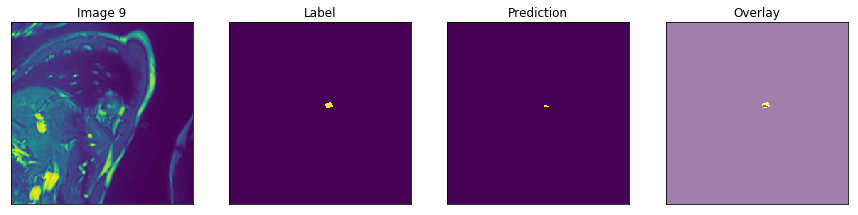

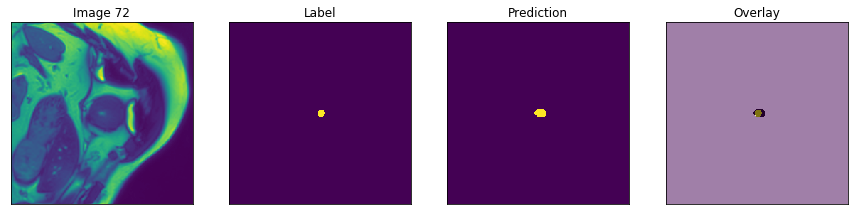

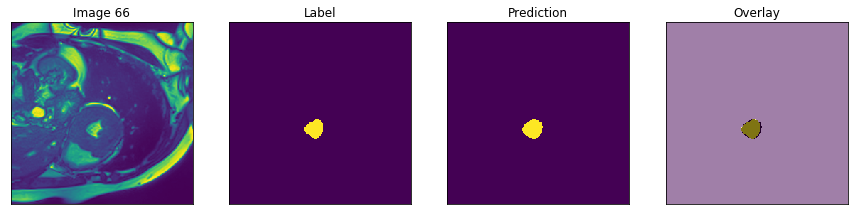

------------------------------
------------------------------
samples, max, min  270 1.0 0.0


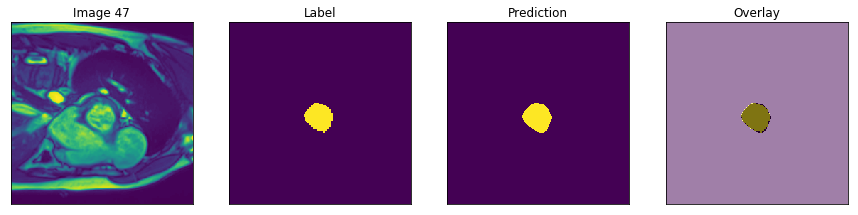

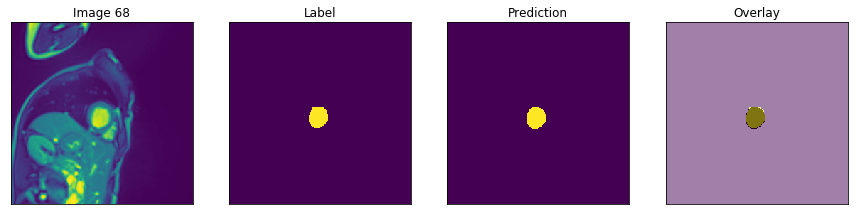

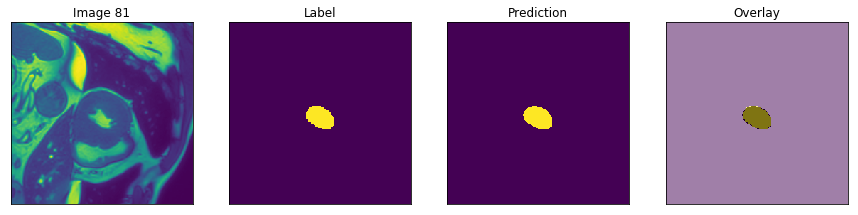

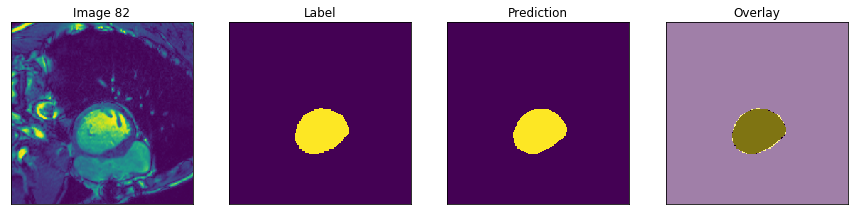

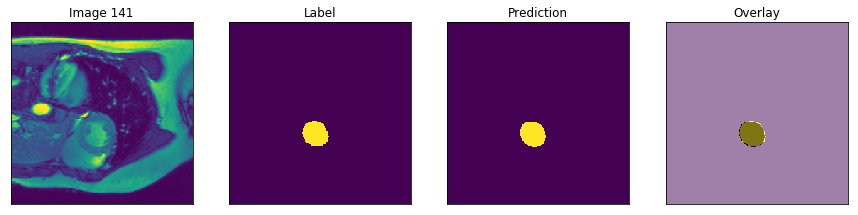

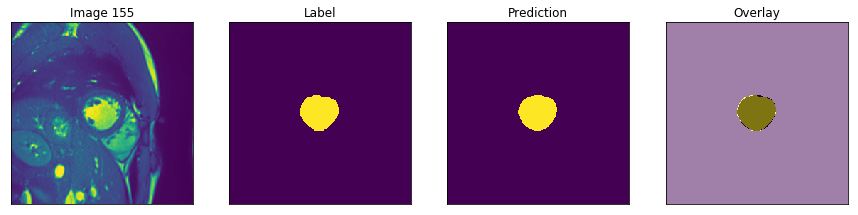

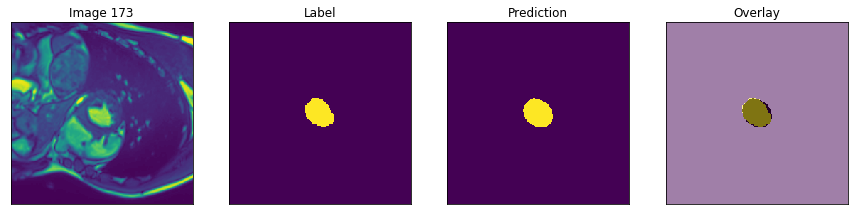

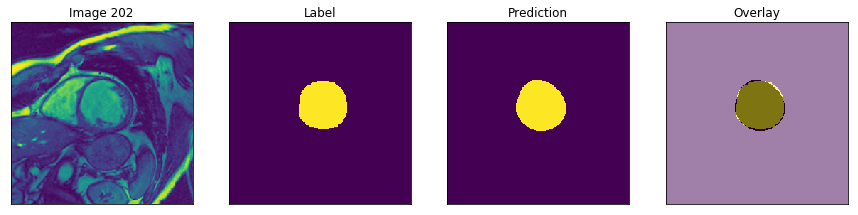

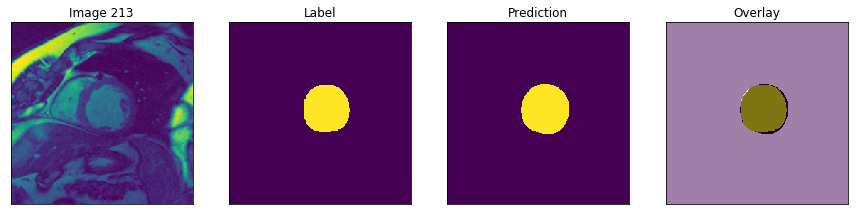

In [24]:
weights_file = "/masvol/heartsmart/unet_model/data/combined_1_2_256_dice_aug_drop_32B.hdf5"
history_file = '/masvol/heartsmart/unet_model/data/combined_1_2_256_dice_aug_drop_32B_learning_history.json'
#image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_256_test_images.npy"
#label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_256_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/data/combined_1_2_256_dice_aug_drop_32B_predictions.npy"
plot_learning_history(history_file)
show_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


In [ ]:
## Analysis on training with 256x256  combined data set (ACDC + Sunnybrook) + Labels with Zero Contours  
### data set prefix combined_1_3_0_256 
### Below are the results of 4 tests
# 1. Training with combined dataset
# 2. Training with combined dataset + Augmentation
# 3. Training with combined dataset (no augmentation),  using Unet with dropout layers
# 4. Training with combined dataset + Augmentation,  using Unet with dropout layers

In [ ]:
# history_file = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_drop_dicecoef_learning_history.json'
# image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_256_test_images.npy"
# label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_256_test_labels.npy"
# pred_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_drop_dicecoef_predictions.npy"
# plot_learning_history(history_file)
# show_performance_statistics(label_file, pred_file)
# find_outliers(label_file, pred_file)
# display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
# print('-'*30)
# print('-'*30)
# zcontour = [21, 84, 127, 220]
# display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


In [25]:
# weights_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_dice.hdf5"
# history_file = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_dice_learning_history.json'
# image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_256_test_images.npy"
# label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_256_test_labels.npy"
# pred_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_dice_predictions.npy"
# plot_learning_history(history_file)
# show_performance_statistics(label_file, pred_file)
# find_outliers(label_file, pred_file)
# display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
# print('-'*30)
# print('-'*30)
# zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
# display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


In [26]:
# weights_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_aug_dice.hdf5" 
# history_file = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_aug_dice_learning_history.json'
# image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_256_test_images.npy"
# label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_256_test_labels.npy"
# pred_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_aug_dice_predictions.npy"
# plot_learning_history(history_file)
# show_performance_statistics(label_file, pred_file)
# find_outliers(label_file, pred_file)
# display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
# print('-'*30)
# print('-'*30)
# zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
# display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


In [27]:
# zcontour = [2, 10, 13, 21, 38, 50, 72, 86, 87, 113, 116, 118, 151, 152, 184, 202, 203, 230]
# display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

In [ ]:
# weights_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_drop_dice.hdf5"
# history_file = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_drop_dice_learning_history.json'
# image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_256_test_images.npy"
# label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_256_test_labels.npy"
# pred_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_drop_dice_predictions.npy"
# plot_learning_history(history_file)
# show_performance_statistics(label_file, pred_file)
# find_outliers(label_file, pred_file)
# display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
# print('-'*30)
# print('-'*30)
# zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
# display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


In [ ]:
# weights_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_aug_drop_dice.hdf5"
# history_file = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_aug_drop_dice_learning_history.json'
# image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_256_test_images.npy"
# label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_256_test_labels.npy"
# pred_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_256_aug_drop_dice_predictions.npy"
# plot_learning_history(history_file)
# show_performance_statistics(label_file, pred_file)
# find_outliers(label_file, pred_file)
# display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
# print('-'*30)
# print('-'*30)
# zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
# display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


## Analysis on training with 176x176  combined data set (ACDC + Sunnybrook)  ( no Labels with zero contours)
### (data set prefix combined_1_3_176)
### Below are the results of 4 tests
1. Training with combined dataset
2. Training with combined dataset + Augmentation
3. Training with combined dataset (no augmentation),  using Unet with dropout layers
4. Training with combined dataset + Augmentation,  using Unet with dropout layers

## reg 176

------------------------------
Model Parameters
tr_epoch  :  80
tr_optimizer  :  Adam
tr_model_name  :  combined_1_2_176_dice_reg_32b
tr_batchsize  :  32
tr_lrrate  :  2e-05
tr_nGPUs  :  2
tr_dropout  :  False
tr_size  :  2437
tr_loss_fn  :  dice_loss
------------------------------
Evaluation on Test set
eval_dice_coeff  :  0.02960764917510527
eval_binary_accuracy  :  0.9473101059595744
eval_loss  :  0.9703923485897206
------------------------------
Values at first and last epoch
------------------------------
loss  :  0.7682273963465331 , 0.02688651335062034
val_loss  :  0.5460216627746332 , 0.06461958025322585
val_binary_accuracy  :  0.86767406346368 , 0.9914796518497779
binary_accuracy  :  0.5057786676503255 , 0.9974463267042553
val_dice_coeff  :  0.45397833917961744 , 0.9353804197467741
dice_coeff  :  0.2317726040204529 , 0.9731134866493797
------------------------------
------------------------------


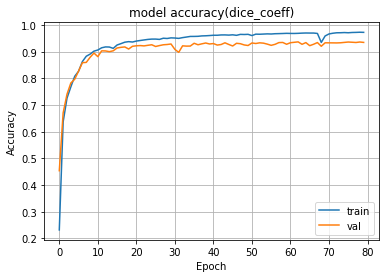

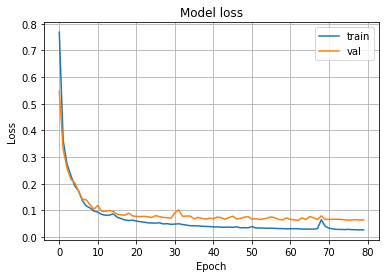

------------------------------
Loss and Accuracy
------------------------------
log_loss :  0.08283288775016605   Accuracy:  0.9205049620227849
weighted log_loss :  0.9573095542584683   Weighted_accuracy:  0.38392442553802564
------------------------------
Model Performance
------------------------------
precision : 0.9405879878683227
recall : 0.9489660994992428
f1 score : 0.9447584697898229

true_p = 424873, false_p = 26837, true_neg = 7888961, false_neg = 22849
confuion matrix
[[7888961   26837]
 [  22849  424873]]



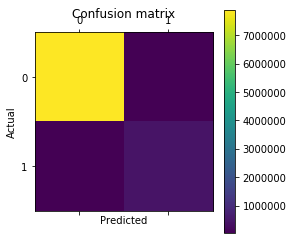

------------------------------
------------------------------
Number of Samples : 270, image size : 176 x 176 
------------------------------
Outliers
------------------------------
Sample Index of labels with zero contours [24, 70, 98]
Sample Index of predictions with zero contours [4, 12, 16, 48, 59, 68, 70, 77, 102, 176, 184]
max-sigmoid values with zero contours [3.114447e-06, 1.0043015e-05, 6.3591017e-09, 4.6477413e-05, 0.011999677, 7.855223e-06, 0.0064199795, 7.817954e-08, 0.0008425223, 0.0020535178, 0.00010036331]
(270,)
------------------------------
Statistics on missed predictions of contour pixels (white pixels)
------------------------------
Sample Index where missed predictions <.05% 2 [70, 141]
Sample Index where missed predictions >25% 31 [4, 10, 12, 15, 16, 18, 24, 43, 48, 57, 59, 68, 77, 84, 92, 97, 98, 102, 106, 154, 176, 178, 184, 189, 202, 204, 216, 234, 239, 243, 249]
Sample Index where missed predictions >50% 20 [4, 10, 12, 16, 18, 24, 48, 57, 59, 68, 77, 84, 98, 

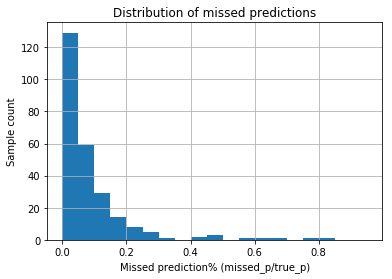

------------------------------
------------------------------
samples, max, min  270 1.0 0.0


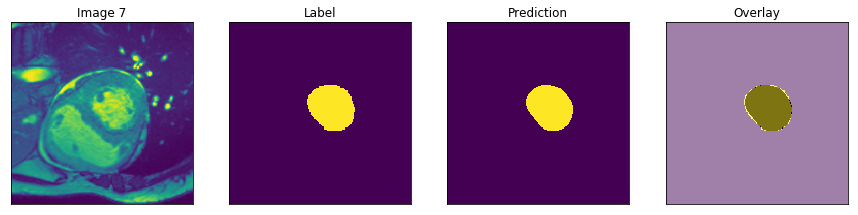

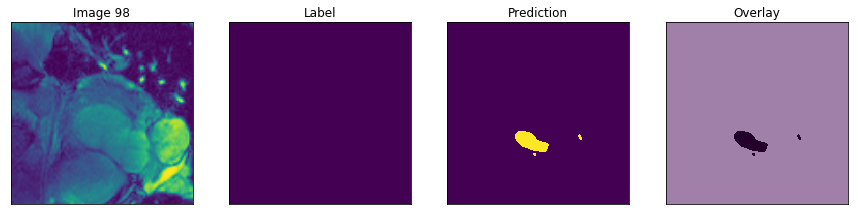

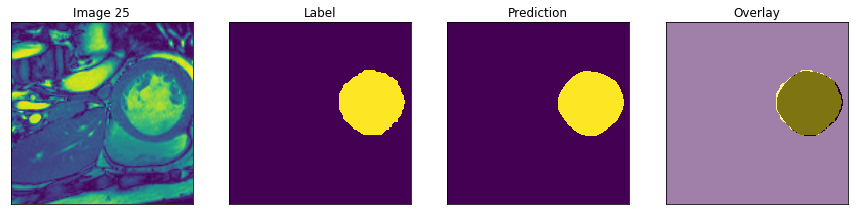

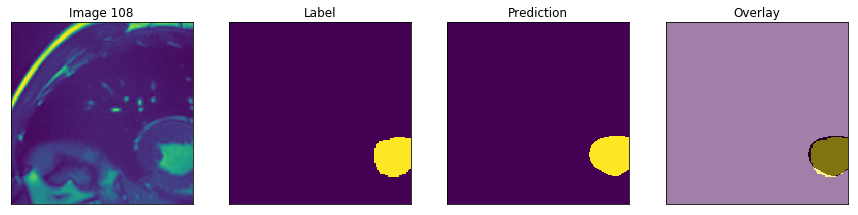

------------------------------
------------------------------
samples, max, min  270 1.0 0.0


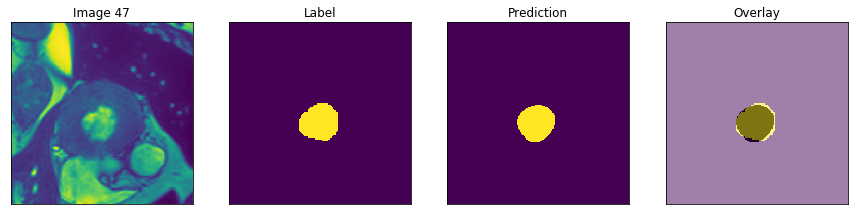

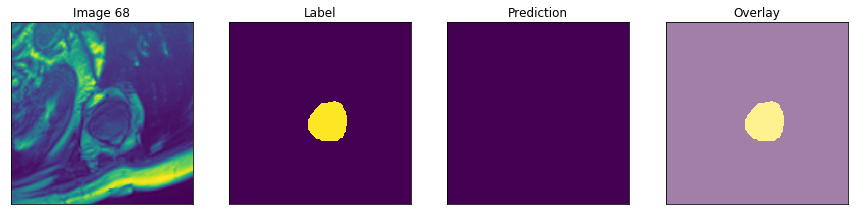

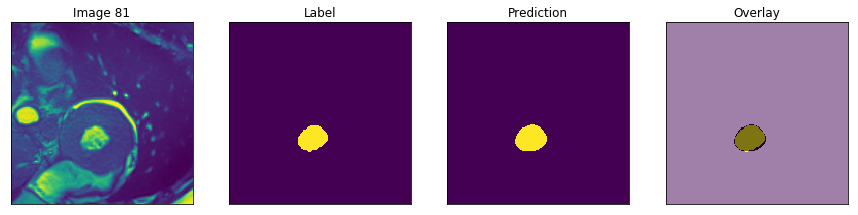

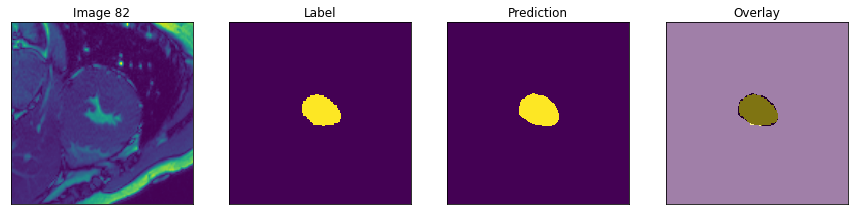

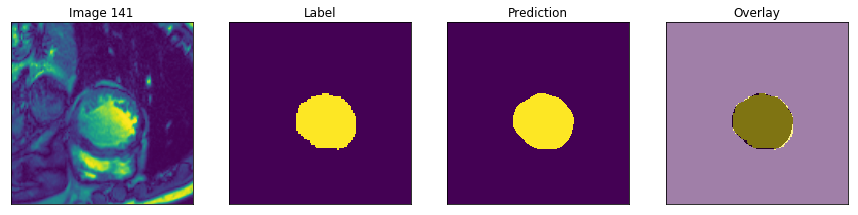

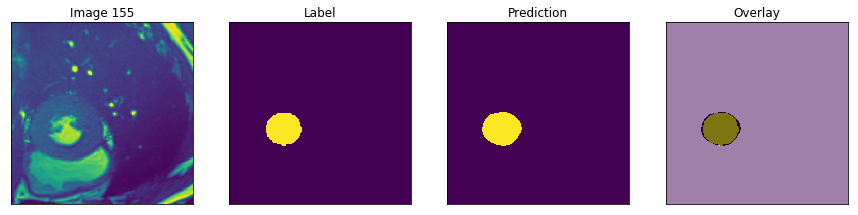

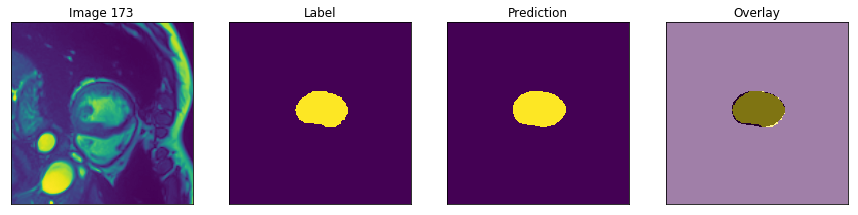

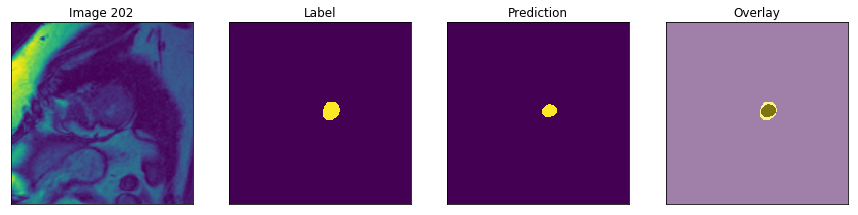

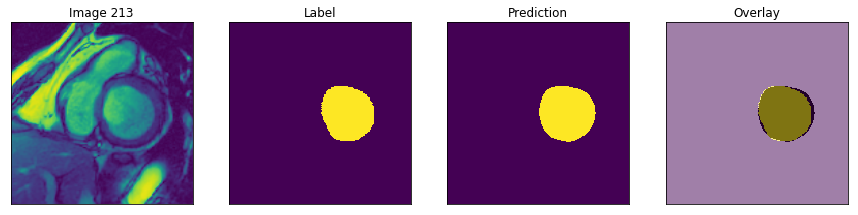

In [29]:
weights_file = "/masvol/heartsmart/unet_model/data/combined_1_2_176_dice_reg_32B.hdf5"
history_file = '/masvol/heartsmart/unet_model/data/combined_1_2_176_dice_reg_32B_learning_history.json'
image_file = "/masvol/output/unet_training/combined_1_2_176_test_images.npy"
label_file = "/masvol/output/unet_training/combined_1_2_176_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/data/combined_1_2_176_dice_reg_32B_predictions.npy"
plot_learning_history(history_file)
show_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


## aug 176

------------------------------
Model Parameters
tr_epoch  :  80
tr_loss_fn  :  dice_loss
tr_batchsize  :  32
tr_lrrate  :  2e-05
tr_model_name  :  combined_1_2_176_dice_aug_32b
tr_nGPUs  :  2
tr_dropout  :  False
tr_size  :  9748
tr_optimizer  :  Adam
------------------------------
Evaluation on Test set
eval_dice_coeff  :  0.002207696518895251
eval_binary_accuracy  :  0.9465355541970994
eval_loss  :  0.9977923066527755
------------------------------
Values at first and last epoch
------------------------------
loss  :  0.4401892941253067 , 0.02346484481936756
binary_accuracy  :  0.8424561634892896 , 0.9951059360417319
val_dice_coeff  :  0.7548910698523889 , 0.9499952954512376
val_binary_accuracy  :  0.9717572457362444 , 0.9915950639431294
dice_coeff  :  0.5598107058135446 , 0.9765351551806324
val_loss  :  0.24510893014761118 , 0.050004704548762394
------------------------------
------------------------------


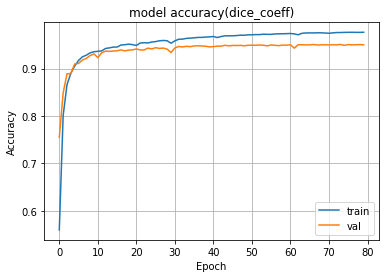

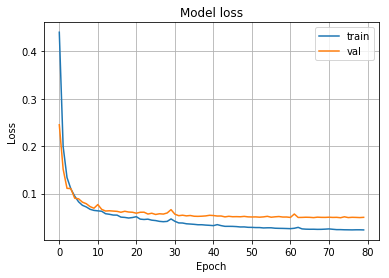

------------------------------
Loss and Accuracy
------------------------------
log_loss :  0.09389458469905768   Accuracy:  0.9103787250299754
weighted log_loss :  1.2272336115684275   Weighted_accuracy:  0.2931022919621117
------------------------------
Model Performance
------------------------------
precision : 0.9598105703890895
recall : 0.9492653923640116
f1 score : 0.9545088571348362

true_p = 425007, false_p = 17796, true_neg = 7898002, false_neg = 22715
confuion matrix
[[7898002   17796]
 [  22715  425007]]



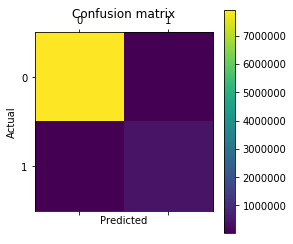

------------------------------
------------------------------
Number of Samples : 270, image size : 176 x 176 
------------------------------
Outliers
------------------------------
Sample Index of labels with zero contours [24, 70, 98]
Sample Index of predictions with zero contours [57, 98, 184]
max-sigmoid values with zero contours [4.2036307e-05, 0.00021442334, 1.2130523e-05]
(270,)
------------------------------
Statistics on missed predictions of contour pixels (white pixels)
------------------------------
Sample Index where missed predictions <.05% 4 [98, 156, 170, 205]
Sample Index where missed predictions >25% 27 [4, 10, 12, 15, 16, 18, 24, 48, 57, 59, 68, 70, 77, 84, 92, 102, 136, 154, 161, 176, 178, 184, 219, 230, 239, 243, 249]
Sample Index where missed predictions >50% 15 [4, 12, 16, 24, 57, 68, 70, 77, 176, 178, 184, 219, 239, 243, 249]
Sample Index where missed predictions >= 100% 4 [24, 70, 77, 249]


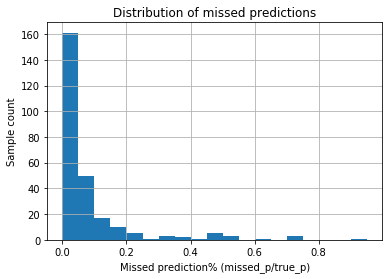

------------------------------
------------------------------
samples, max, min  270 1.0 0.0


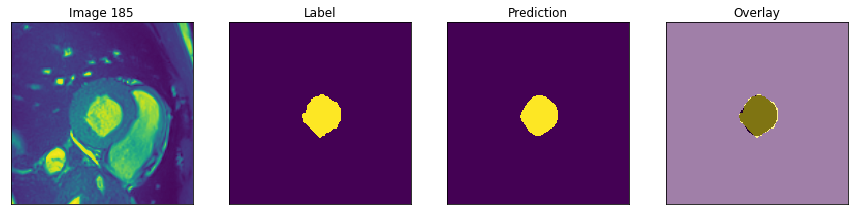

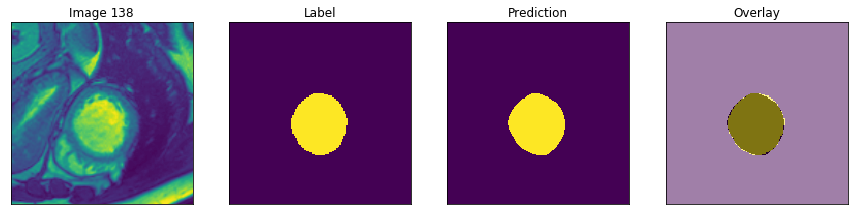

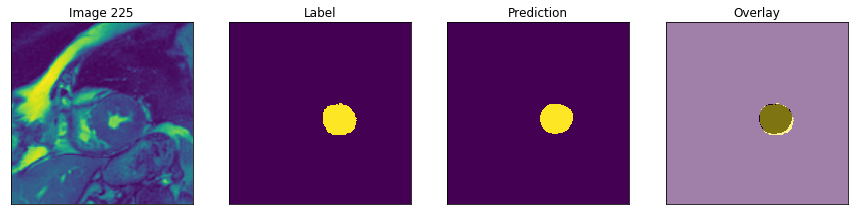

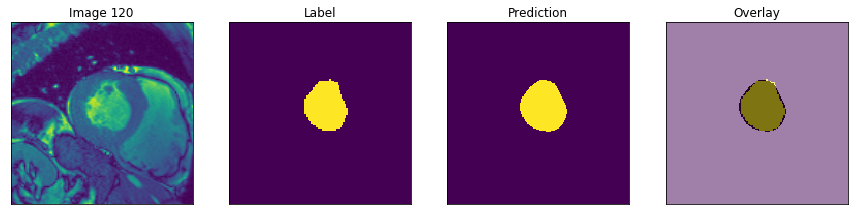

------------------------------
------------------------------
samples, max, min  270 1.0 0.0


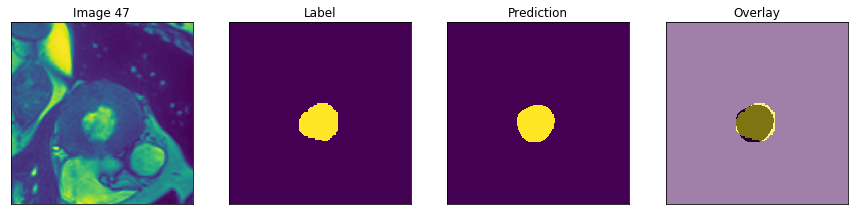

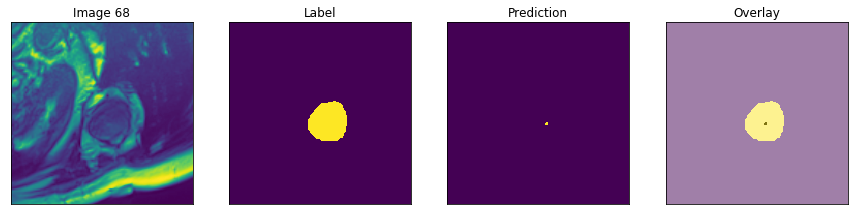

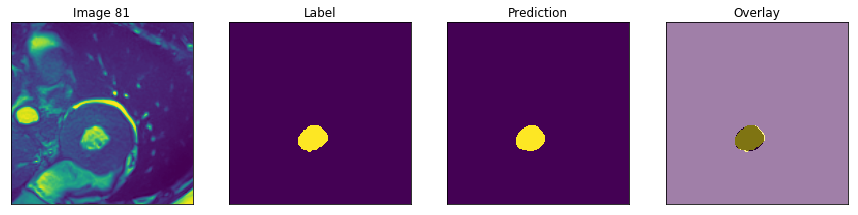

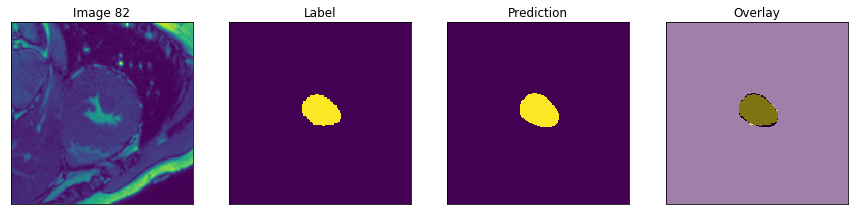

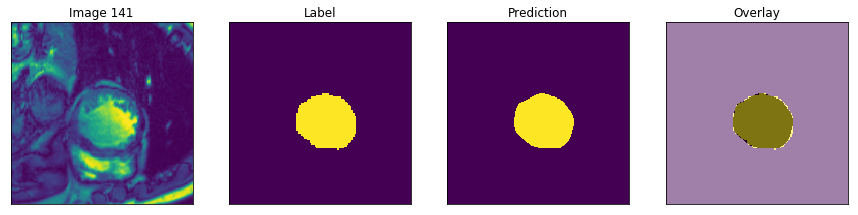

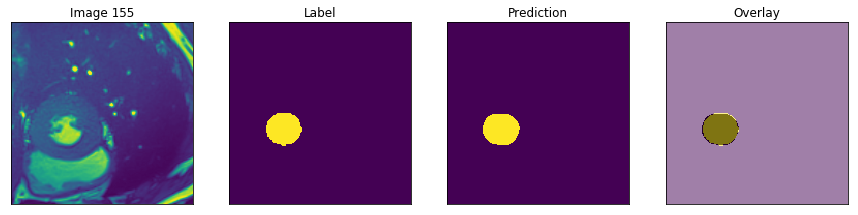

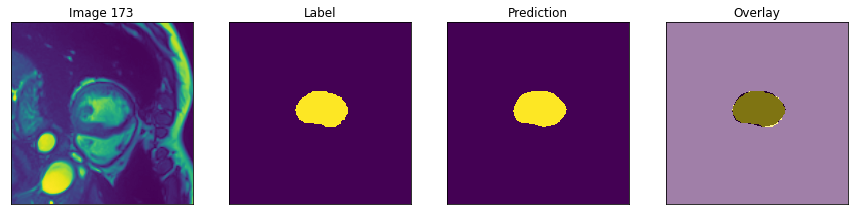

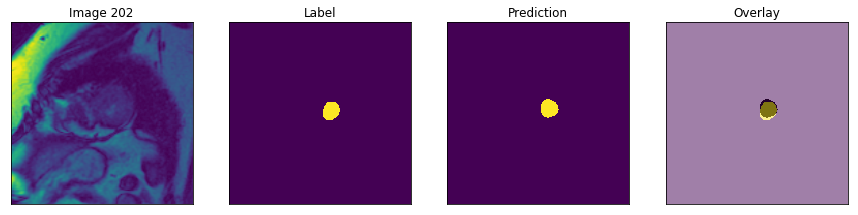

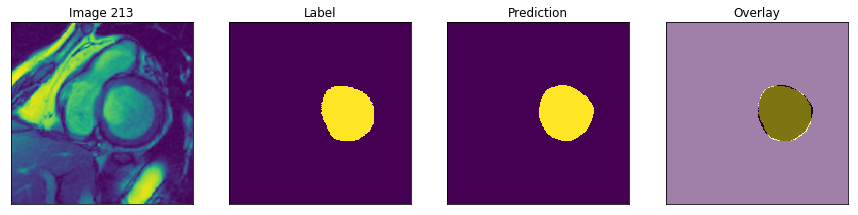

In [30]:
weights_file = "/masvol/heartsmart/unet_model/data/combined_1_2_176_dice_aug_32B.hdf5"
history_file = '/masvol/heartsmart/unet_model/data/combined_1_2_176_dice_aug_32B_learning_history.json'
#image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_176_test_images.npy"
#label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_176_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/data/combined_1_2_176_dice_aug_32B_predictions.npy"
plot_learning_history(history_file)
show_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


## drop 176

------------------------------
Model Parameters
tr_epoch  :  80
tr_optimizer  :  Adam
tr_loss_fn  :  dice_loss
tr_batchsize  :  32
tr_lrrate  :  2e-05
tr_model_name  :  combined_1_2_176_dice_drop_32b
tr_nGPUs  :  2
tr_dropout  :  True
tr_size  :  2437
------------------------------
Evaluation on Test set
eval_dice_coeff  :  0.1555256583072521
eval_binary_accuracy  :  0.9511450917632491
eval_loss  :  0.8444743483154862
------------------------------
Values at first and last epoch
------------------------------
loss  :  0.8137299486035993 , 0.02914497444359323
binary_accuracy  :  0.3563687329784059 , 0.9972247322318859
val_binary_accuracy  :  0.9323210833502598 , 0.9899777643016128
dice_coeff  :  0.18627005298667348 , 0.9708550255564068
val_dice_coeff  :  0.544361523917464 , 0.9261123450075994
val_loss  :  0.4556384780367867 , 0.07388765499240062
------------------------------
------------------------------


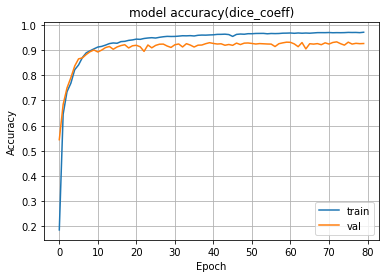

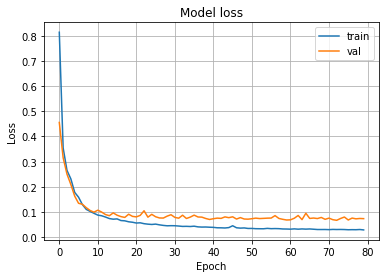

------------------------------
Loss and Accuracy
------------------------------
log_loss :  0.10432266609779506   Accuracy:  0.9009345494810259
weighted log_loss :  0.7231073532460223   Weighted_accuracy:  0.4852420922785479
------------------------------
Model Performance
------------------------------
precision : 0.9068769082385474
recall : 0.9639463774395719
f1 score : 0.9345411906857698

true_p = 431580, false_p = 44317, true_neg = 7871481, false_neg = 16142
confuion matrix
[[7871481   44317]
 [  16142  431580]]



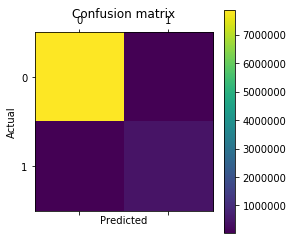

------------------------------
------------------------------
Number of Samples : 270, image size : 176 x 176 
------------------------------
Outliers
------------------------------
Sample Index of labels with zero contours [24, 70, 98]
Sample Index of predictions with zero contours [4, 12, 16, 57, 59, 68, 70, 77, 84, 176, 184]
max-sigmoid values with zero contours [1.2668477e-06, 9.711457e-05, 3.9361332e-08, 0.002231081, 0.26979747, 6.4877513e-06, 5.8547294e-06, 9.0712776e-10, 0.0056163203, 0.0032651364, 3.017334e-05]
(270,)
------------------------------
Statistics on missed predictions of contour pixels (white pixels)
------------------------------
Sample Index where missed predictions <.05% 2 [70, 76]
Sample Index where missed predictions >25% 44 [4, 10, 11, 12, 15, 16, 18, 24, 43, 48, 52, 57, 59, 68, 77, 84, 85, 88, 92, 97, 98, 101, 102, 106, 136, 154, 176, 178, 184, 186, 189, 202, 204, 216, 218, 219, 221, 234, 237, 239, 243, 249, 268, 269]
Sample Index where missed predictions >5

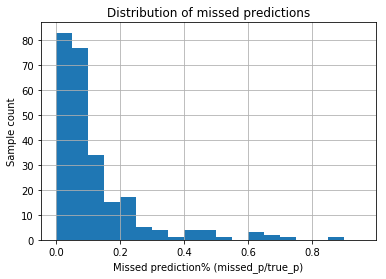

------------------------------
------------------------------
samples, max, min  270 1.0 0.0


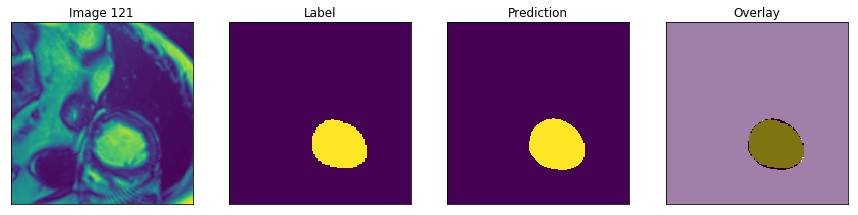

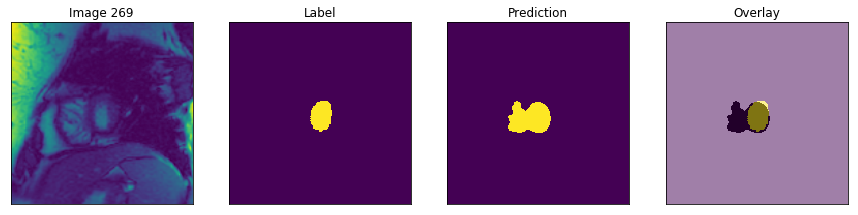

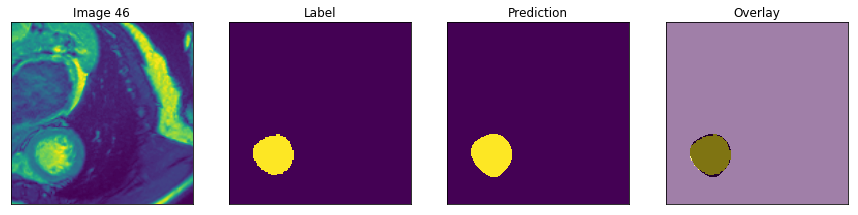

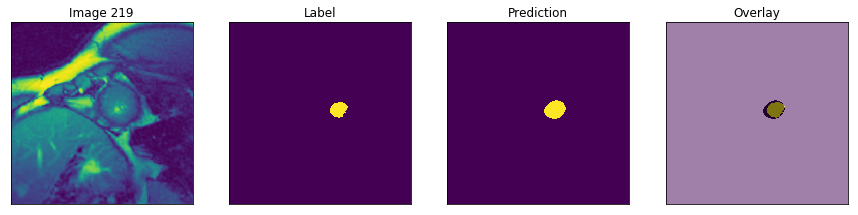

------------------------------
------------------------------
samples, max, min  270 1.0 0.0


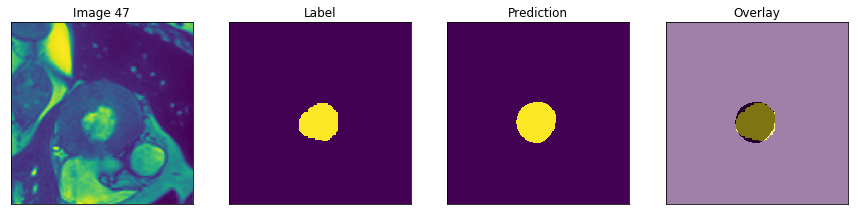

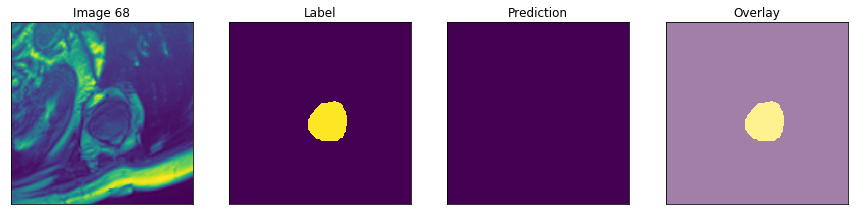

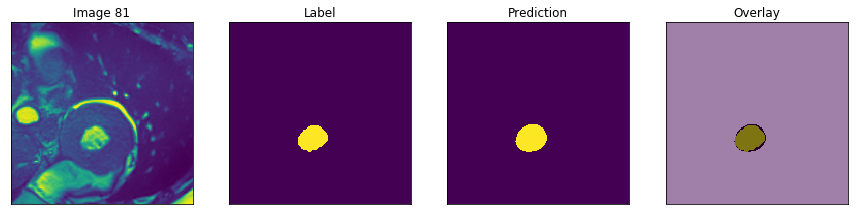

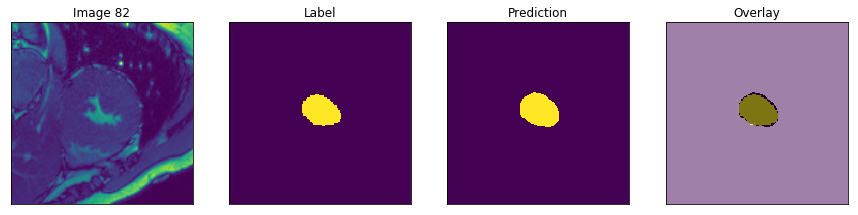

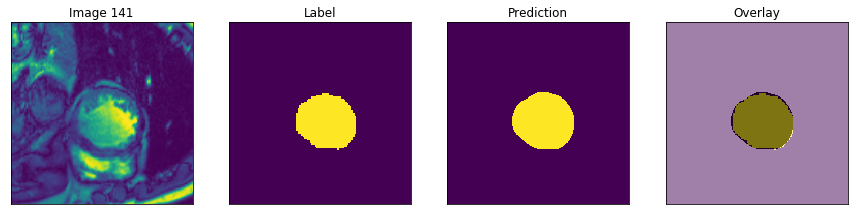

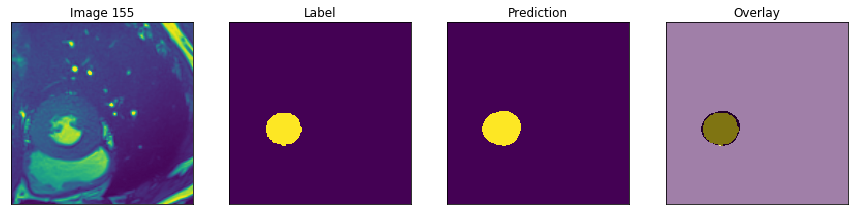

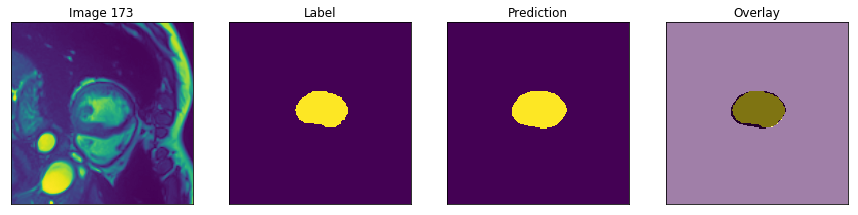

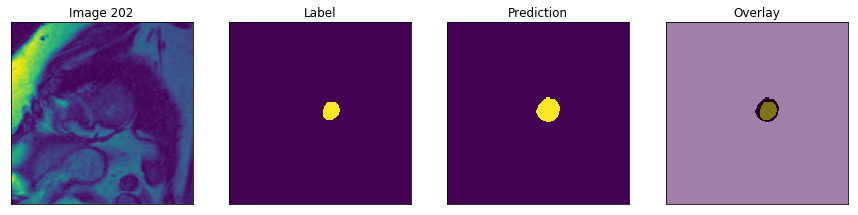

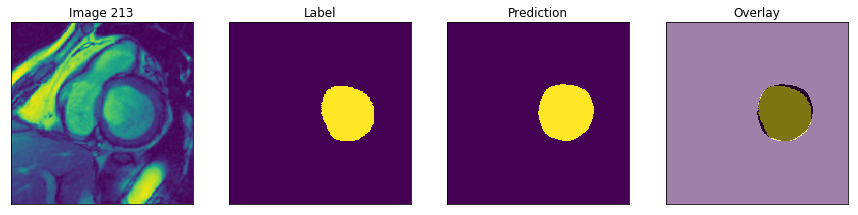

In [31]:
weights_file = "/masvol/heartsmart/unet_model/data/combined_1_2_176_dice_drop_32B.hdf5"
history_file = '/masvol/heartsmart/unet_model/data/combined_1_2_176_dice_drop_32B_learning_history.json'
#image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_176_test_images.npy"
#label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_176_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/data/combined_1_2_176_dice_drop_32B_predictions.npy"
plot_learning_history(history_file)
show_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


## aug drop 176

------------------------------
Model Parameters
tr_epoch  :  80
tr_optimizer  :  Adam
tr_batchsize  :  32
tr_lrrate  :  2e-05
tr_model_name  :  combined_1_2_176_dice_aug_drop_32b
tr_nGPUs  :  2
tr_dropout  :  True
tr_loss_fn  :  dice_loss
tr_size  :  9748
------------------------------
Evaluation on Test set
eval_binary_accuracy  :  0.9469184085174843
eval_dice_coeff  :  0.01749885024295913
eval_loss  :  0.9825011491775513
------------------------------
Values at first and last epoch
------------------------------
val_dice_coeff  :  0.7615108669721163 , 0.9472898605542305
val_binary_accuracy  :  0.9728610573670803 , 0.991359908641913
binary_accuracy  :  0.807280844956002 , 0.9948095414203753
dice_coeff  :  0.5606473593352299 , 0.9730170631475955
loss  :  0.43935264075649305 , 0.026982936852404507
val_loss  :  0.23848913279863504 , 0.05271013944576948
------------------------------
------------------------------


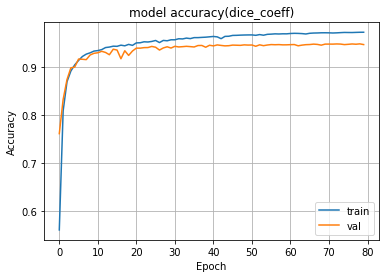

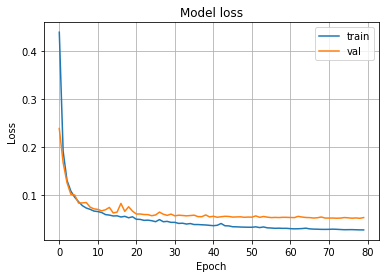

------------------------------
Loss and Accuracy
------------------------------
log_loss :  0.09953855484295264   Accuracy:  0.9052550472295013
weighted log_loss :  1.2981718994459546   Weighted_accuracy:  0.27303046422751776
------------------------------
Model Performance
------------------------------
precision : 0.9594046253519338
recall : 0.9452874774971969
f1 score : 0.95229373486819

true_p = 423226, false_p = 17908, true_neg = 7897890, false_neg = 24496
confuion matrix
[[7897890   17908]
 [  24496  423226]]



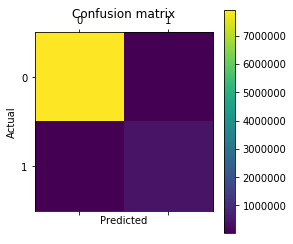

------------------------------
------------------------------
Number of Samples : 270, image size : 176 x 176 
------------------------------
Outliers
------------------------------
Sample Index of labels with zero contours [24, 70, 98]
Sample Index of predictions with zero contours [4, 12, 57, 59, 68, 70, 77]
max-sigmoid values with zero contours [0.19487873, 4.39192e-08, 1.5962799e-08, 1.7691185e-09, 4.6523397e-05, 6.9433004e-10, 2.250794e-07]
(270,)
------------------------------
Statistics on missed predictions of contour pixels (white pixels)
------------------------------
Sample Index where missed predictions <.05% 3 [44, 70, 241]
Sample Index where missed predictions >25% 28 [4, 10, 12, 15, 16, 18, 24, 48, 57, 59, 66, 68, 77, 84, 88, 98, 102, 124, 154, 176, 178, 184, 202, 219, 230, 239, 243, 249]
Sample Index where missed predictions >50% 19 [4, 10, 12, 16, 24, 48, 57, 59, 68, 77, 98, 154, 176, 178, 184, 202, 230, 243, 249]
Sample Index where missed predictions >= 100% 2 [24, 98

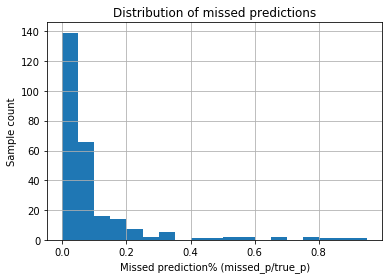

------------------------------
------------------------------
samples, max, min  270 1.0 0.0


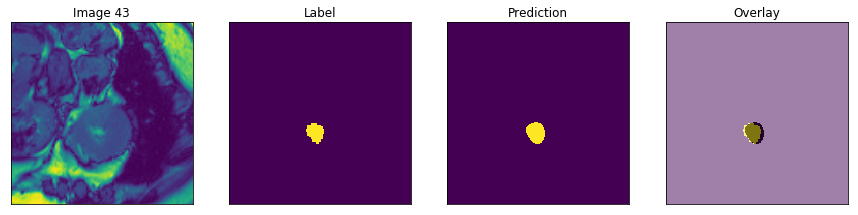

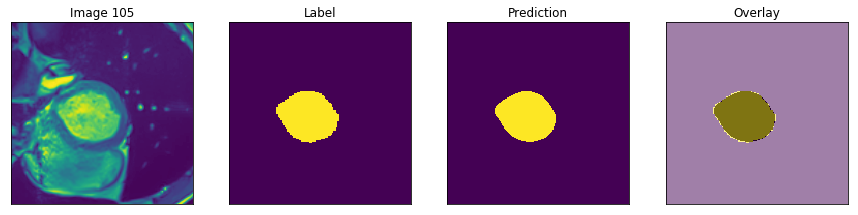

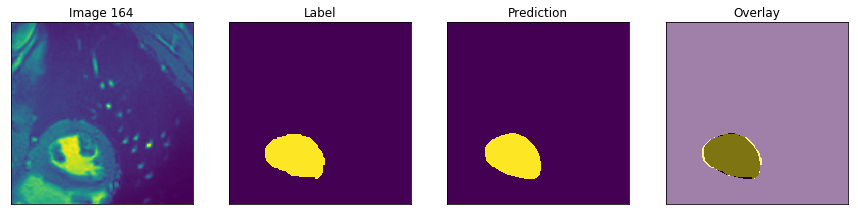

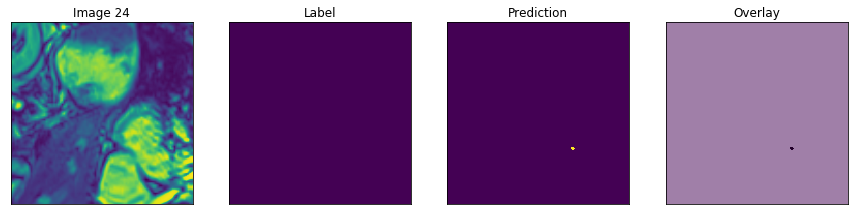

------------------------------
------------------------------
samples, max, min  270 1.0 0.0


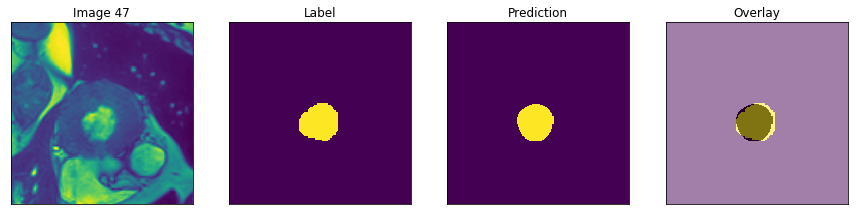

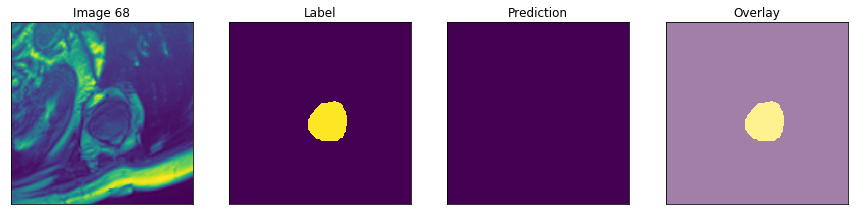

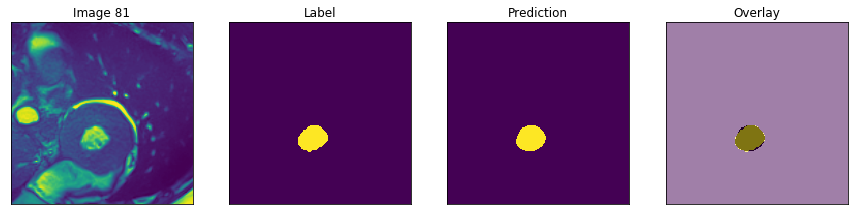

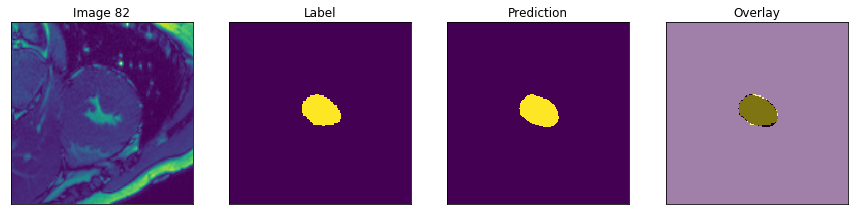

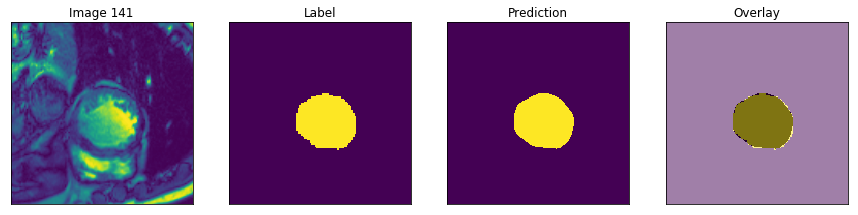

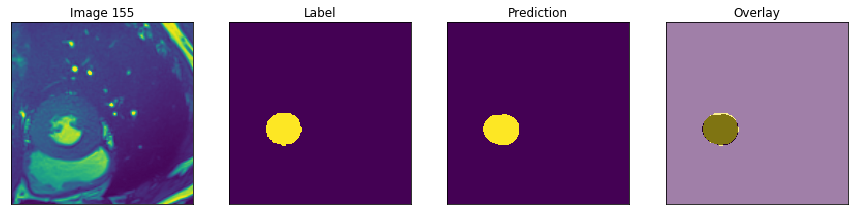

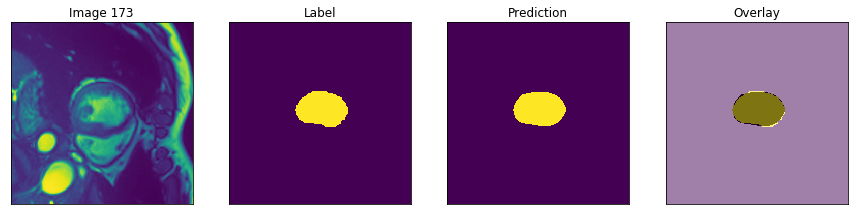

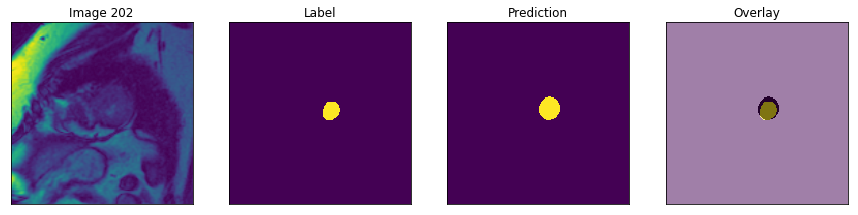

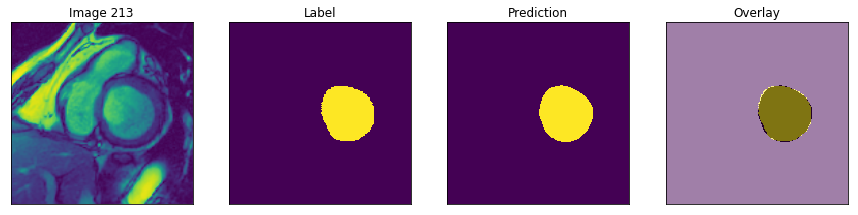

In [32]:
weights_file = "/masvol/heartsmart/unet_model/data/combined_1_2_176_dice_aug_drop_32B.hdf5"
history_file = '/masvol/heartsmart/unet_model/data/combined_1_2_176_dice_aug_drop_32B_learning_history.json'
#image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_176_test_images.npy"
#label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_176_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/data/combined_1_2_176_dice_aug_drop_32B_predictions.npy"
plot_learning_history(history_file)
show_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


In [ ]:
# zcontour = [173, 188]
# display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

In [ ]:
# zcontour = [55, 81, 82, 141]
# display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

## Analysis on training with 176x176  combined data set (ACDC + Sunnybrook) + Labels with Zero Contours  
### (data set prefix combined_1_3_0_176)
### Below are the results of 4 tests
1. Training with combined dataset
2. Training with combined dataset + Augmentation
3. Training with combined dataset (no augmentation),  using Unet with dropout layers
4. Training with combined dataset + Augmentation,  using Unet with dropout layers

In [ ]:

# weights_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_2_0_176_dice.hdf5"
# history_file = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_176_dice_learning_history.json'
# image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_176_test_images.npy"
# label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_176_test_labels.npy"
# pred_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_176_dice_predictions.npy"
# plot_learning_history(history_file)
# show_performance_statistics(label_file, pred_file)
# find_outliers(label_file, pred_file)
# display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
# print('-'*30)
# print('-'*30)
# zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
# display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


In [ ]:
# zcontour = [8, 14, 20, 32, 39, 95, 135]
# display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

In [ ]:
# weights_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_176_aug_dice.hdf5"
# history_file = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_176_aug_dice_learning_history.json'
# image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_176_test_images.npy"
# label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_176_test_labels.npy"
# pred_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_176_aug_dice_predictions.npy"
# plot_learning_history(history_file)
# show_performance_statistics(label_file, pred_file)
# find_outliers(label_file, pred_file)
# display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
# print('-'*30)
# print('-'*30)
# zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
# display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


In [ ]:
# Sample Index of labels with zero contours [8, 14, 20, 32, 39, 95, 135]
# Sample Index of predictions with zero contours [14, 20, 77, 95, 135, 169, 189]
# Sample Index where missed predictions >= 100% 6 [8, 32, 39, 77, 169, 189]
# zcontour = [8, 14, 20, 32, 39, 95, 135]
# display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


In [ ]:
# zcontour = [14, 20, 77, 95, 135, 169, 189]
# display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

In [ ]:
# zcontour = [8, 32, 39, 77, 169, 189]
# #display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)
# display_images_predictions (image_file,  pred_file, image_list = zcontour)

In [ ]:
# weights_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_176_drop_dice.hdf5"
# history_file = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_176_drop_dice_learning_history.json'
# image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_176_test_images.npy"
# label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_176_test_labels.npy"
# pred_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_176_drop_dice_predictions.npy"
# plot_learning_history(history_file)
# show_performance_statistics(label_file, pred_file)
# find_outliers(label_file, pred_file)
# display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
# print('-'*30)
# print('-'*30)
# zcontour = [4, 8, 32, 39, 46, 63, 65, 77,]
# display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)
#combined_1_3_0_176_drop_dice

In [ ]:
# weights_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_176_aug_drop_dice.hdf5"
# history_file = '/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_176_aug_drop_dice_learning_history.json'
# image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_176_test_images.npy"
# label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_176_test_labels.npy"
# pred_file = "/masvol/heartsmart/unet_model/baseline/results/combined_1_3_0_176_aug_drop_dice_predictions.npy"
# plot_learning_history(history_file)
# show_performance_statistics(label_file, pred_file)
# find_outliers(label_file, pred_file)
# display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
# print('-'*30)
# print('-'*30)
# zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
# display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)
#combined_1_3_0_176_drop_dice

In [ ]:
# zcontour = [8, 14, 20, 32, 39, 95, 135]
# display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

In [ ]:
# #zcontour = [14, 20, 46, 65, 77, 102, 104, 154, 169, 189]
# zcontour = [14, 20, 63, 77, 95, 104, 135, 169, 189, 198, 212]
# display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

In [ ]:
## 

## 176x176 images.. Training with BatchNormalization

In [33]:
# weights_file = "/masvol/heartsmart/unet_model/baseline/results/1_3_0_176_bn.hdf5"
# history_file = '/masvol/heartsmart/unet_model/baseline/results/1_3_0_176_bn_learning_history.json'
# image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_176_test_images.npy"
# label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_176_test_labels.npy"
# pred_file = "/masvol/heartsmart/unet_model/baseline/results/1_3_0_176_bn_predictions.npy"
# plot_learning_history(history_file)
# show_performance_statistics(label_file, pred_file)
# find_outliers(label_file, pred_file)
# display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
# print('-'*30)
# print('-'*30)
# zcontour = [4, 8, 32, 39, 63, 65, 67, 77, 83, 104, 144, 169, 198, 201]
# display_images_predictions (image_file, pred_file, image_list = zcontour)
#combined_1_3_0_176_drop_dice

In [ ]:
# zcontour = [8, 32, 39, 77, 169, 189]
# display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

In [34]:
#'1_3_0_176_bn_drop_learning_history.json'
# weights_file = "/masvol/heartsmart/unet_model/baseline/results/1_3_0_176_bn_drop.hdf5"
# history_file = '/masvol/heartsmart/unet_model/baseline/results/1_3_0_176_bn_drop_learning_history.json'
# image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_176_test_images.npy"
# label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_176_test_labels.npy"
# pred_file = "/masvol/heartsmart/unet_model/baseline/results/1_3_0_176_bn_drop_predictions.npy"
# plot_learning_history(history_file)
# show_performance_statistics(label_file, pred_file)
# find_outliers(label_file, pred_file)
# display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
# print('-'*30)
# print('-'*30)
# zcontour = [4, 8, 32, 39, 63, 65, 67, 77, 83, 104, 144, 169, 198, 201]
# display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)
#combined_1_3_0_176_drop_dice

In [35]:
#'1_3_0_176_bn_drop_learning_history.json'
# weights_file = "/masvol/heartsmart/unet_model/baseline/results/1_3_0_176_bn2.hdf5"
# history_file = '/masvol/heartsmart/unet_model/baseline/results/1_3_0_176_bn2_learning_history.json'
# image_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_176_test_images.npy"
# label_file = "/masvol/heartsmart/unet_model/baseline/data/combined_1_3_0_176_test_labels.npy"
# pred_file = "/masvol/heartsmart/unet_model/baseline/results/1_3_0_176_bn2_predictions.npy"
# plot_learning_history(history_file)
# show_performance_statistics(label_file, pred_file)
# find_outliers(label_file, pred_file)
# display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
# print('-'*30)
# print('-'*30)
# zcontour = [4, 8, 32, 39, 63, 65, 67, 77, 83, 104, 144, 169, 198, 201]
# display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)
#combined_1_3_0_176_drop_dice

## Analysis of predictions on  DSB data set (256x256  images)

In [ ]:
# image_file = "/masvol/heartsmart/unet_model/data/baseline/combined_1_3_256_test_images.npy"
# pred_file = "/masvol/heartsmart/unet_model/data/baseline/combined_1_3_256_predictions.npy"
# find_outliers_in_prediction(pred_file)
# display_images_predictions (image_file, pred_file, num_images = 4, random_images = True)
# print ("-"*30)
# imglist = [21, 84, 127]
# display_images_predictions (image_file, pred_file, image_list = imglist)


## Analysis of predictions on  DSB data set (176x176  images)

In [ ]:
# image_file = "/masvol/heartsmart/unet_model/data/baseline/combined_1_3_176_test_images.npy"
# pred_file = "/masvol/heartsmart/unet_model/data/baseline/combined_1_3_176_predictions.npy"
# find_outliers_in_prediction(pred_file)
# display_images_predictions (image_file, pred_file, num_images = 4, random_images = True)
# print ("-"*30)
# print ("-"*30)
# imglist = [173]
# display_images_predictions (image_file, pred_file, image_list = imglist)